# <span style="color:#F4563B"> Prédiction du risque de défaut des clients d'une microfinance à but non lucratif : Cas de Kiva </span>

# <a name="cadregén"></a> <span style="color:#FA8072"> Cadre général de l'étude </span>

*En introduction de ce projet, présentons le contexte scolaire dans lequel il est rédigé à l'ENSAE, le contexte professionnel dans lequel il est étudié du point de vue de l'entreprise concernée, ainsi que la problématique traitée et le plan suivant lequel elle sera présentée.*

## <span style="color:#F5B7B1"> Contexte scolaire </span>

L'***ENSAE*** est l'une des principales Grandes Écoles françaises spécialisée en Économie, Data Science, Sciences Sociales Quantitatives, Finance et Actuariat. Parmi les enseignements fondamentaux de cette École, figurent les compétences informatiques pour lesquelles le cours ***Python pour le data scientist/ économiste*** est administré aux étudiants de deuxième année.

Il s'agit de les initier à la ***manipulation***, la ***visualisation*** et la ***modélisation de données*** en ***Python***, langage aujourd'hui très présent chez les scientifiques. Dans le but de confronter les enseignements reçus à des problématiques réelles, des thématiques et bases de données à analyser sous forme de projets ont été demandées aux étudiants répartis en groupes de deux (02) ou de trois (03).

C'est dans ce cadre que nous avons choisi, avec l'accord des enseignants, de travailler sur du ***credit scoring*** sur une base de la microfinance à but non lucratif ***Kiva*** collectée sur leur [site internet](https://www.kiva.org/build/data-snapshots) le ***20 Octobre 2020***.

## <a name="contexteprof"></a> <span style="color:#F5B7B1"> Contexte professionnel (fonctionnement de Kiva) </span>

***Kiva*** est une organisation internationale à but non lucratif, plateforme de [financement participatif](https://www.economie.gouv.fr/cedef/financement-participatif) fondée en 2005 à San Francisco en solution au problème de non bancarisation touchant encore 1,7 milliards de personnes dans le monde aujourd'hui (Source : [site de Kiva](https://www.kiva.org/about)). Elle met en relation des prêteurs (à capacité de financement) et des projets (à besoin de financement). A ce jour, 1,51 millards de prêts ont été financés par 2 921 prêteurs à travers Kiva (Source : [site de Kiva](https://www.kiva.org/about)).

Deux (02) types de prêteurs se distinguent : d'une part les particuliers, et d'autre part les entreprises, organisations ou fondations partenaires. Aucun d'entre eux ne reçoit d'intérêt, puisqu'aucun intérêt n'est demandé aux emprunteurs. Les prêteurs particuliers n'y gagnent donc rien financièrement, et les partenaires reçoivent parfois de petits frais de service de la part de Kiva. En effet, l'organisation dispose de fonds collectés chaque jour auprès de donateurs, qui leur permettent de rémunérer les 110 employés (à la date du 11/12/2020, source : [site de Kiva](https://www.kiva.org/about)) qui y travaillent, de financer les petits frais de service des partenaires, de prêter directement aux entrepreneurs et de couvrir tous les frais d'opérations liés à leur activité.

Par ailleurs, en situation d'incapacité de remboursement d'un prêt, aucun dédommagement n'est assuré par Kiva. Les fournisseurs doivent simplement considérer le solde impayé comme une perte. Pourtant, les institutions financières telles que nous les connaissons (banques, microfinances, etc...), tirent leurs bénéfices des intérêts que les emprunteurs payent au moment du remboursement. Si un prêt est remboursé après le délai, cela constitue un manque à gagner, et s’il n’est pas remboursé, cela constitue en plus une perte de capital lorsqu’aucune véritable garantie de paiement n’est exigée à l’emprunteur.

Ainsi, en tant que prêteur (intermédiaire des prêteurs), Kiva est nécessairement confrontée à la problématique de non remboursement des prêts. Toutefois, à la différence des banques et microfinances pour lesquelles le remboursement est une question, non seulement de pérennité mais surtout de rentabilité, Kiva s'y interesse pour limiter les pertes des particuliers prêteurs et de ses partenaires, et ainsi encourager les dons et partenariats pour assurer la perrenité de ce service dont l'utilité est évidente.

Consciente de cela, Kiva a mis en place un système de sélection et de suivi et évaluation des projets à financer. Pour être en accord avec cette idée de fournir du financement à ceux qui ne sont pas en mesure de les obtenir auprès des banques, Kiva a mis en place un système de garantie (orienté microfinance) plus adapté aux agents qui ne sont pas en mesure de disposer de garanties telles qu'exigées par les banques (propriétés ou autres capitaux disponibles), sur la base duquel il approuve ou pas le prêt : la **"[souscription sociale](https://www.kiva.org/businesscenter/what-is-social-underwriting)"**.

Il est question pour l'emprunteur de rechercher lui-même, durant une **"période de collecte privée de fonds"**, cinq (05) à ving-cinq (25) prêteurs (particuliers ou organisations) de sa communauté qui se porteront garants de lui en lui prêtant une certaine somme. Les emprunteurs de Kiva peuvent également (facultatif) trouver des administrateurs qui se portent garants de leurs prêts en mettant leur réputation et leur crédibilité en jeu, et/ ou fournir trois (03) références (clients, fournisseurs, petits commerces de sa communauté, etc...).

Le système de sélection consiste alors en un jugement de la réputation d'un emprunteur et de la crédibilité de son projet ; le premier se déduisant simplement de la réputation de ses références, administrateurs ou garants, et le second relevant de l'étude de la faisabilité et de la rentabilité du projet pour lequel le financement est demandé. Après financement, le projet est suivi et évalué par les experts de Kiva pour s'assurer de leur bonne gestion. Et, si l'emprunteur se retrouve tout de même dans la difficulté de rembourser son prêt, le partenaire ou Kiva (le prêteur) rééchelonne le prêt afin de lui faciliter le remboursement.

## <span style="color:#F5B7B1"> Problématique et objectifs du travail </span>

Dans le même sillage que le processus de sélection assez subjectif présenté, ce travail se propose de répondre d'une façon plus objective à la question : à qui prêter ? Cette problématique relève du credit scoring et cette étude est conduite, bien qu'en premier lieu dans une optique de mise en pratique de la programmation en language Python, également dans le but d’élaborer un modèle statistique qui puisse permettre de séparer les emprunteurs (projets) potentiels de Kiva entre ceux pour qui des fonds pourraient être collectés et ceux à qui on refuse le financement.

Concernant l'aspect "programmation", les techniques suivantes (liste non exhaustive) seront appliquées :
* importation dynamique et statistique de la base de données ;
* webscrapping ;
* représentation spaciale ;
* natural language processing (NLP) ;
* etc...

Par alleurs, quant à la modélisation, il sera spécifiquement question :
* d’analyser les caractéristiques individuelles des emprunteurs (projets) liées à l'échec ;
* de dégager le profil des projets qui sont remboursés et le profil de ceux qui ne le sont pas ;
* de construire un modèle qui rend compte, sous la forme d’un score, du niveau de risque que représente chaque projet ;
* de proposer une échelle de notation des projets suivant leurs scores ;
* de proposer une stratégie permettant d’évaluer les projets à l'aide du modèle construit.

## <span style="color:#F5B7B1"> Hypothèse </span>

Le travail qui sera effectué repose sur l’hypothèse principale qu’il existe une différence dans les caractéristiques des projets qui sont remboursés et de ceux qui ne le sont pas.

## <span style="color:#F5B7B1"> Plan du travail </span>

<span style="color:#FA8072"> Section I) Cadre théorique de l'étude </span>

<span style="color:#F5B7B1"> I) Généralités sur la microfinance à but non lucratif et le credit scoring </span>

<span style="color:#F5B7B1"> II) Revue de littérature et méthodologie de l'étude </span>

<span style="color:#FA8072"> Section II) Cadre pratique de l'étude </span>

<span style="color:#F5B7B1"> I) Preprocessing et visualisation uni-variée </span>

<span style="color:#F5B7B1"> II) Analyse multi-variée et visualisation multi-variée </span>

<span style="color:#F5B7B1"> III) Modélisation </span>

# <span style="color:#FA8072"> Cadre théorique de l'étude </span>

*Avant de se lancer dans les analyses proprement dites, il convient de présenter le concept de microfinance à but non lucratif qui pourrait être nouveau pour beaucoup, d'expliquer succintement le processus d'emprunt chez Kiva, de récapituler quelques travaux sur le credit scoring ayant inspiré la méthodologie que nous avons adopté et de dérouler cette méthodologie.*





## <span style="color:#F5B7B1"> Généralités sur la microfinance à but non lucratif et le credit scoring </span>

*Nous débutons cette section par la présentation du concept de microfinance à but non lucratif.*

### <span style="color:#FED2CA"> La microfinance à but non lucratif </span>

*Tout d'abord, la microfinance, qu'est-ce que c'est ?*

#### La microfinance

La microfinance se définit comme un ensemble de services financiers (crédit, assurance, épargne) destinés aux pauvres exclus du système bancaire traditionnel pour leur permettre de financer une activité génératrice de revenu, pour leur inclusion financière. L'on assimile très souvent la microfinance à son produit le plus populaire, le ***microcrédit***. Etant donné que notre projet ne concerne que ce dernier produit, nous vous proposons de nous arrêter quelques instants sur ce concept.

##### Etymologie du microcrédit

À ce jour, il n’existe pas de définition universelle du microcrédit. Cependant, l’idée de base retrouvée dans toutes les définitions est contenue dans l’étymologie de ce mot. Pour comprendre le concept de microcrédit, il est alors sagace de revenir à sa genèse et à son histoire.

Le mot *« microcrédit »* est composé à partir de l’adjectif grec *« mikros »*, généralement traduit en *« petit »* ou *« un peu »*, qui qualifie tout ce qui est de faible dimension ; et du verbe latin *« credere »* qui se traduit en *« faire confiance à »*, *« faire confiance pour »* et également *« confier en prêt »*. Au sens brut, un microcrédit renvoie donc simplement à un prêt de faible dimension, la dimension étant ici le montant. Mais la conception du microcrédit ne se limite pas à cette idée, et provient du contexte dans lequel cette notion est née.

##### Origine du microcrédit

Bien que des antécédents puissent être retracés dans plusieurs endroits dans le monde, le microcrédit doit sa popularité à l’initiative du ***Dr Muhammad Yunus*** au début des années 70. Avec ses étudiants de l’université de Chittagong au Bangladesh, le professeur d’économie constate que de nombreux marchands et artisans ont besoin de petites sommes d’argent pour développer leurs activités mais ne peuvent pas les obtenir auprès des banques car, pauvres, ils ne possèdent pas de garantie et les montants sollicités sont trop faibles pour générer les bénéfices souhaités.

Il s’engage alors à prêter de l’argent à ces artisans sous des conditions plus raisonnables : un prêt n’est accordé qu’à un groupe d’artisans qui pourront développer leurs activités séparément mais qui devront le rembourser ensemble. En d’autres termes, chacun des artisans est garant des autres.

Ainsi, il conçoit un nouveau système de garantie en marge de celui pratiqué par les banques, basé sur la confiance et la solidarité. Satisfait de l’utilité procurée par le premier prêt, Muhammad Yunus crée en 1976 au Bangladesh la Grameen Bank, première institution spécialisée dans le microcrédit et première tentative de solution entrepreneuriale formelle moderne à l’exclusion bancaire des plus pauvres.

Il doit à cette initiative le surnom « banquier des pauvres » et le prix Nobel de la paix reçu en 2006. Avec le succès de ce nouveau système de prêts perceptible à l’évolution des activités locales qui témoigne de son utilité et à son taux de remboursement de l’ordre de 97% pour des taux d’intérêts élevés qui démontre sa rentabilité, ce modèle ne tarda pas à être copié un peu partout dans le monde, pour aider les plus pauvres à démarrer des activités génératrices de revenus.

##### Définition du microcrédit

C’est ainsi que le microcrédit s’associe, non seulement à un prêt de faible montant, mais également à un prêt destiné aux pauvres ne disposant ni d’apport personnel suffisant, ni de la garantie exigée par les banques traditionnelles. Sans garantie et les montants demandés étant trop faibles donc jugés peu rentables, ces banques ne sont pas intéressées à accorder de tels prêts.

#### La microfinance à but non lucratif

Le microcrédit correspond alors au financement offert aux populations exclues du système bancaire classique ([Ellé, 2017](https://doi.org/10.1016/j.rgo.2017.09.004)). En général, les microcrédits offrent aux pauvres la possibilité d’emprunter de l’argent contre un accord pour rembourser ces fonds avec intérêts et/ou frais à une/plusieurs date(s) future(s) fixée(s). Mais ce modèle, qualifié de ***microfinance à but lucratif***, bien qu'étant le plus répandu, n'est pas le seul appliqué. Kiva, Babyloan, des organisations ***à but non lucratif*** proposent à ces personnes des prêts ***sans intérêt*** et ***sans frais***. Leur activité est qualifiée de ***microfinance à but non lucratif***.

*Nous rebondissons directement sur l'activité de Kiva dont le fonctionnement général a été présenté dans le [contexte professionnel](#contexteprof) de ce projet. Il ne reste qu'à dérouler le processus d'emprunt.*

#### Processus d'emprunt chez Kiva

Les étapes d'un prêt chez Kiva sont les suivantes :

* **La demande de prêt** : L'emprunteur adresse une demande de prêt soit directement à Kiva, soit à un partenaire.
* **L'étude de la demande de prêt** : Si la demande est directement adressée à Kiva, c'est le système de [souscription sociale](#contexteprof) qui permet à l'organisation de décider si elle approuve le prêt ou pas. Autrement dit, Kiva approuve ou désapprouve le prêt selon la réputation et la crédibilité des références de l'emprunteur. Si la demande est plutôt adressée à un partenaire, celui-ci se charge d'approuver ou de refuser avec l'aide d'institutions de crédit ou d'autres organisations à but non lucratif. Kiva procède toutefois au suivi du prêt pour le partenaire.
* **La collecte privée de fonds** : Comme expliqué dans le principe de [souscription sociale](#contexteprof), l'emprunteur dispose d'une certaine période pour obtenir du financement auprès de prêteurs de son entourage.
* **La collecte publique de fonds** : Le prêt est posté sur le site de Kiva. L'emprunteur doit activement faire campagne pour recueillir le plus de fonds possible et un financement entier dans un délai de trente (30) jours pour pouvoir recevoir l'argent. Les prêteurs peuvent contribuer à partir de 25 dollars.
* **Le remboursement** : Les prêteurs sont remboursés au fur et à mesure, suivant le calendrier initialement fixé. Ils sont directement remboursés sur leurs comptes Kiva et peuvent retirer, faire des dons ou financer d'autres prêts avec ces fonds.

*Ayant terminé avec la présentation de Kiva et de la microfinance à but non lucratif, nous poursuivons avec le second concept clé de ce travail : le ***credit scoring***.*

### <span style="color:#FED2CA"> Présentation du credit scoring </span>

*Dans les établissements de crédit, le recours au credit scoring est une pratique très populaire permettant d’évaluer, de mesurer, de quantifier le risque de crédit. Ainsi, avant de passer au credit scoring proprement dit, la notion de risque de crédit sera abordée.*

#### Le risque de crédit

##### Définition

Lorsqu’un agent (individu, ménage, entreprise, établissement de crédit) octroie un prêt à un autre agent, il existe toujours pour le prêteur un risque appelé risque de crédit. C'est un concept très important et très courant dans les établissements financiers, pour lequel de nombreux auteurs ont proposé des définitions pouvant être synthétisées comme suit :

Le *risque de crédit* est le risque de non-remboursement de ses dettes par un emprunteur défaillant. Il s’assimile au degré d’incertitude qui pèse sur l’aptitude d’un emprunteur à rembourser sa dette, c’est-à-dire à l’incertitude des pertes pouvant être générées par un crédit donné.

##### Composantes

Le risque de crédit se décompose en trois éléments :

- le **risque de défaut** qui est la probabilité d’un manquement ou d’un retard de l’emprunteur sur le paiement de sa dette (aux échéances fixées) ;
- le **risque de recouvrement en cas de défaut** ou risque lié à l’incertitude du recouvrement une fois le défaut survenu ;
- et le **risque de dégradation de la qualité de crédit** qui est le risque que la qualité perçue de l’emprunteur se dégrade pendant la durée du crédit.

*Dans le cadre de ce projet, nous nous intéressons uniquement au risque de défaut des emprunteurs de Kiva.*

##### Risque de défaut

La ***défaillance*** c’est la situation dans laquelle l’emprunteur n’est plus en mesure d’honorer ses engagements financiers. Dans la pratique, chaque prêteur a la latitude de définir le défaut, c’est-à-dire les conditions dans laquelle un emprunteur est considéré comme défaillant.

En Italie par exemple, l’association des banques indique que le défaut peut correspondre à un arriéré de 180 jours tandis qu’en Espagne, un arriéré de 90 jours semble acceptable (Gouriéroux & Tiomo, 2007). La situation de défaillance (défaut) est donc définie par chaque pays et par chaque établissement de crédit selon ses spécificités.

*Après ce petit tour de la notion de risque de crédit appréhendé par le credit scoring, nous passons à la présentation du credit scoring proprement dit.*

#### Le credit scoring

##### Définition

Le credit scoring est une méthode très utilisée dans les établissements de crédit, intégrée dans la décision d’octroi ou de rejet de crédit. Plusieurs auteurs ont tenté de définir ce concept. Quelques unes des définitions les plus partagées dans la littérature sont ci-après citées.

- « Le credit scoring est une méthode d’évaluation du risque de crédit des demandes de prêt. À partir de données historiques et de techniques statistiques, le credit scoring tente d’isoler les effets de plusieurs caractéristiques des emprunteurs sur le défaut de paiement. La méthode produit un « score » qu’une banque peut utiliser pour classer ses potentiels emprunteurs en termes de risque. » ([Mester, 1997](https://www.researchgate.net/profile/Loretta_Mester/publication/5051659_What_Is_the_Point_of_Credit_Scoring/links/54b668cf0cf2bd04be32098a.pdf))
- « Le credit scoring est le recours aux modèles statistiques en vue de transformer des données pertinentes en des indicateurs numériques mesurables à des fins d’aide à la décision d’octroi ou de refus de crédit. » ([Anderson, 2007](https://global.oup.com/academic/product/the-credit-scoring-toolkit-9780199226405?cc=us&lang=en&#))

De ces différentes définitions, il ressort que le credit scoring prend en entrée un historique d’un ensemble de caractéristiques liées à des prêts antérieurement contractés, construit à l’aide de techniques statistiques un modèle qui prédit, sous la forme d’une note (ou « score »), la probabilité qu’un potentiel emprunteur ne rembourse pas son prêt comme prévu (défaut) et qui guide le prêteur pour décider s’il lui octroie ou pas un crédit.

*Pour résoudre les problématiques de credit scoring, la littérature nous oriente vers un schéma assez précis ci-après déroulé.*

##### <a name="schemares"></a> Schéma de résolution d’une problématique de credit scoring

Disposant de l’historique de caractéristiques liées à des prêts antérieurement contractés nécessaire, la construction de modèles de credit scoring implique généralement le processus suivant, présenté par [N. Chen et al. (2016)](https://doi.org/10.1007/s10462-015-9434-x) :

* **Définition du défaut de remboursement** : elle s’assimile à la définition de la variable cible, une variable qualitative à deux classes indiquant si un emprunteur/ projet est « bon » ou « mauvais », c’est-à-dire s’il est digne de confiance/ prometteur ou pas. Cette qualité d’être « bon » ou « mauvais » est exprimée en fonction du défaut de remboursement. Par exemple, un-emprunteur peut être jugé mauvais s’il enregistre au moins un défaut de remboursement sur une période donnée. Préciser le sens considéré du défaut de remboursement est donc primordial.
* **Pré-traitement des données** : il s’agit du traitement des valeurs manquantes, de la normalisation, du filtrage, etc. . . appliqués aux données constituant l’historique de caractéristiques liées aux prêts.
* **Sélection des variables et réduction de la dimensionnalité** : cela consiste au filtrage des caractéristiques (variables) et emprunteurs (individus) non pertinents. Les outils de sélection des variables (Analyse en Composantes Principales ou ACP, Analyse des Correspondances Multiples ou ACM, analyse discriminante, etc. . . ) servent à la réduction de la dimensionnalité de l’ensemble de données.
* **Implémentation des modèles** : différents algorithmes sont implémentés à partir des données issues de la phase précédente pour prédire la variable cible à deux modalités.
* **Évaluation du modèle** : La performance des prédictions est évaluée sur un ensemble test pour comparer les différents algorithmes implémentés.

In fine, on obtient un modèle prédisant la probabilité de défaut de remboursement d’un potentiel emprunteur à partir de ses caractéristiques, probabilité qui pourra être convertie sous forme de score puis associée à une échelle de risque qui, elle-même, ne pourra qu’orienter le décideur (ici Kiva) dans sa décision d’octroi ou de rejet de crédit puisque ce dernier devra décider à partir de quel seuil les demandes seront rejetées, acceptées ou encore mieux étudiées.

*Le credit scoring a à son compte de nombreux avantages, et présente également de nombreuses limites.*

##### Quelques avantages et limites du credit scoring

Parmi les avantages du credit scoring, on cite :

* l’amélioration de l’efficience dans le processus d’analyse et de livraison du crédit (Kulkosky, 1996) : le calcul du score de crédit est rapide, ce qui non seulement permet une prise de décision également rapide, mais autorise l’automatisation du processus d’octroi de crédits ;
* la réduction de la discrimination entre les clients : le credit scoring fournit une évaluation objective de la solvabilité des emprunteurs ; deux clients ayant les mêmes caractéristiques sont traités de la même façon par le modèle de credit scoring contrairement à l’évaluation subjective d’agents dans laquelle les affinités et sentiments sont prises en compte ;
* la souplesse de la méthode, permettant de modifier la politique de crédit simplement en jouant sur le seuil de sélection des dossiers.

Entre autres limites du credit scoring, on peut citer :

* l’hypothèse fondamentale de toute modélisation prédictive est que le passé peut prédire l’avenir ([Berry & Linoff, 2000](https://doi.org/10.1108/imds.2000.100.5.245.2)), pourtant l’avenir peut être différent du passé : les prédictions de défaut du credit scoring s’appuient uniquement sur les comportements passés et parfois, ceux-ci changent rapidement au cours du temps nécessitant une mise à jour constante des modèles ;
* l’omission de variables importantes ([Avery et al., 2000](https://www.federalreserve.gov/pubs/bulletin/1996/796lead.pdf)) : le défaut de crédit peut également s’expliquer par des variables qui ne sont pas prises en compte dans le modèle ;
* le modèle peut être construit en utilisant un échantillon biaisé de clients à qui des crédits ont été accordés ([Hand, 2001](https://doi.org/10.1093/imaman/12.2.139)) : ceci s’explique principalement par le fait que les clients à qui des crédits ont été refusés ne soient pas inclus dans l’échantillon de base du modèle puisqu’il n’est pas possible de se prononcer sur leur défaillance ; une attention particulière doit ainsi être prêtée pour limiter au mieux le biais causé par l’écart entre le profil des clients composant l’échantillon d’origine et celui de l’ensemble des clients.

*Tout au long de ce travail, des techniques de data mining seront utilisées. Nous choisissons de justifier cela en présentant l'utilité que peut avoir le data mining dans la résolution d'une problématique de credit scoring.*

##### Credit scoring et data mining

Une définition pratique du data mining est « la découverte de structures intéressantes, inattendues, ou de grande valeur dans un vaste ensemble de données » ([Hand et al., 2001](https://doc.lagout.org/Others/Data%20Mining/Principles%20of%20Data%20Mining%20%5BHand%2C%20Mannila%20%26%20Smyth%202001-08-01%5D.pdf)). Ces dernières années, les techniques de data mining ont été de plus en plus utilisées pour construire des modèles de credit scoring ([Peng & Chwee, 2004](https://go.gale.com/ps/anonymous?id=GALE%7CA119370565&sid=googleScholar&v=2.1&it=r&linkaccess=abs&issn=01295977&p=AONE&sw=w)).

En effet, l’élaboration de modèles de credit scoring nécessite l’exploitation de grandes masses de données, matière dans laquelle excelle le data mining. À cet effet, les trois grandes catégories de techniques de data mining sont généralement nécessaires : les techniques de description et de visualisation, les techniques d’association et de segmentation, et les techniques de classification et d’estimation (ou de régression).

* La **description** et la **visualisation** interviennent au commencement du processus, pour identifier les structures très souvent complexes dissimulées dans ces énormes masses de données. Les techniques de description et de visualisation (Analyse en Composantes Principales ou ACP, l’Analyse des Correspondances Multiples ou ACM, l’Analyse Factorielle Discriminante ou AFD) permettent ainsi de comprendre et d’appréhender les ensembles de données du credit scoring.

* Les techniques d’**association** (algorithmes à l’instar de l’algorithme Apriori, l’algorithme OPUS) et de **segmentation** (algorithmes k-moyennes (k-means), espérance-maximisation (expectation-maximization algorithm), ...) servent respectivement à déterminer quelles variables s’associent (on parle d’extraire des règles d’association), et à regrouper les objets similaires en séparant ceux qui ne le sont pas. Elles interviennent pour identifier les liens et associations existants entre les caractéristiques sélectionnées pour la construction des modèles de credit scoring.

* La **classification** se définit comme la prédiction d’une variable cible catégorielle tandis que l’estimation et la **régression** fait référence à la prédiction d’une variable cible quantitative. En credit scoring, il s’agit généralement d’une variable à deux modalités indiquant si un client a fait défaut ou pas. Elle peut être directement prédite à l’aide de techniques de classification telles que les arbres de décision, ou encore sous forme de probabilité que le client prenne une des modalités à l’aide de techniques de régression telles que la régression logistique.

Ainsi, le recours au data mining dans le processus de construction de modèles de credit scoring est une pratique justifiée et appropriée, et également courante dans la littérature.

*Ayant acquis les notions essentielles sur le fonctionnement de Kiva et le credit scoring, nous passons à présent à la présentation de quelques travaux empiriques portant sur la question étudiée et au déroulement de la méthodologie qui sera mise en oeuvre pour la résoudre.*






## <span style="color:#F5B7B1"> Revue de la littérature et méthodologie </span>

### <span style="color:#FED2CA"> Revue de la littérature </span>

La problématique du défaut de remboursement est une problématique très abordée dans la littérature, beaucoup plus traitée dans les banques mais de plus en plus étudiée dans les microfinances à but non lucratif également. De nombreux articles et ouvrages décrivant chacun une problématique de credit scoring bien précise, les méthodes utilisées pour la modélisation et les résultats obtenus existent, et également ceux étudiant les facteurs explicatifs du défaut de remboursement existent. Pour notre étude, nous nous sommes inspirés de plusieurs d'entre eux, dont un en particulier porte directement sur les données étudiées.

Il s'agit de la thèse intitulée **"[Predicting a successful loan in prosocial lending: the role of partner accreditation and storytelling on Kiva.org](https://www.researchgate.net/publication/326426143)"** rédigée par Martina Pocchiari. Le principal apport de ce document à notre travail concerne l'appréhension du défaut de remboursement, élément clé de notre projet comme présenté dans le [schéma de résolution d'une problématique de credit scoring](#schemares). La définition du défaut de remboursement (donc de la variable cible) retenue sera alors précisée lors de la présentation de la base de données de l'étude.

Désirant que ce projet reste principalement axé sur l'application des techniques de Python, seuls les principaux enseignements tirés des différents travaux parcourus ([M. Godquin (2004) : Microfinance Repayment Performance in Bangladesh: How to Improve the Allocation of Loans by MFIs](https://www.researchgate.net/publication/222651429_Microfinance_Repayment_Performance_in_Bangladesh_How_to_Improve_the_Allocation_of_Loans_by_MFIs), [S. Kumar (2007) : Bank of One: Empirical Analysis of Peer-to-Peer Financial Marketplaces](https://www.semanticscholar.org/paper/Bank-of-One%3A-Empirical-Analysis-of-Peer-to-Peer-Kumar/0c9ef0db8b24aadebc928a806e0af0b44a3d9e91), [J. Ledgerwood (1998) : Microfinance Handbook: An Institutional and Financial Perspective](http://hdl.handle.net/10986/12383), [J. Galak, D. Small, A. T. Stephen (2011) : Microfinance Decision Making: A Field Study of Prosocial Lending](https://doi.org/10.1509/jmkr.48.SPL.S130), etc...) seront déroulés ici. Ainsi, ces travaux nous ont enseigné d'une part, que les possibilités sont très ouvertes en ce qui concerne le choix des variables à inclure dans les modèles de credit scoring et, d'autre part, qu'il n'existe pas de technique de modélisation unanimement meilleure que les autres. Toutefois, les techniques que nous avons recensées parmi celles ayant montré les meilleurs performances sont les arbres de décision, la régression logistique et les forêts aléatoires.


### <span style="color:#FED2CA"> Méthodologie de l'étude </span>

*Cette sous-section traite de la méthodologie choisie pour résoudre la problématique de credit scoring posée par l’étude. Elle expose les différentes étapes qui seront réalisées après l'importation dynamique et statique.*

Pour atteindre l’objectif d’évaluation du niveau de confiance à accorder aux emprunteurs et leurs projets, il sera question de construire un modèle prédisant la probabilité que ces derniers fassent défaut à partir de leurs caractéristiques, de convertir cette probabilité sous forme de score puis d’associer à ces scores une échelle de risque qui orientera Kiva dans le choix des projets à approuver. Ceci nécessitera l’exploitation d’un grand ensemble de données. Ceci étant, pour la réalisation de projets d’analyse de grands volumes de données comme c’est le cas de ce travail, il existe un processus standard très utilisé développé par IBM dans les années soixante : il s’agit de la méthode CRISP-DM (Cross Industry Standard Process for Data Mining). Cette étude sera réalisée suivant cette méthodologie.

La méthode CRISP-DM (Cross Industry Standard Process for Data Mining) consiste en six (06) phases, chaque phase étant constituée de diverses tâches à réaliser. Ces six phases sont : la compréhension du problème métier, la compréhension des données, la préparation des données, la modélisation, l’évaluation et le déploiement (Larose, 2005). Il n’existe pas d’ordre préétabli pour l’exécution des différentes phases. Selon le résultat escompté, la méthode peut être personnalisée en réalisant des phases avant d’autres, en faisant des allers-retours entre des phases ou encore en priorisant des phases par rapport à d’autres. Le schéma retenu pour ce travail est ci-après décrit :

#### La compréhension du problème métier ou de l’entreprise

La première étape du processus CRISP-DM consiste à comprendre la problématique que le data mining vise à résoudre, à comprendre les objectifs de l’entreprise en matière de data mining. Cela nécessite dans un premier temps de recueillir les besoins de l’entreprise, définir l’objectif principal de l’étude et le traduire en des objectifs spécifiques de data mining comme il a été fait dans le [cadre général](#cadregén). La phase de compréhension du problème comprend également le recensement des ressources disponibles dans l’entreprise et la définition de certains critères essentiels que sont la variable d’intérêt, la population cible, la période à étudier. S’agissant d’une problématique de credit scoring, définir la variable d’intérêt revient à définir le défaut de remboursement.

#### La compréhension et la préparation des données

À la suite de la compréhension du métier, viennent la compréhension et la préparation des données. La finalité de ces deux phases est la constitution d’une base de données structurée, apurée et prête pour la modélisation. Bien que le schéma classique du processus CRISP-DM place la compréhension des données avant la préparation des données, ces deux phases sont prises ensemble dans cette étude car des allers-retours entre l’une et l’autre phase seront nécessaires pour la mener à bien. Ceci sera mieux expliqué dans la présentation de ces deux phases ci-après.

* La **phase de compréhension des données**, comme son nom l’indique, a pour but de s’imprégner des données disponibles pour le data mining. Elle inclut les tâches suivantes :
    * la ***collecte des données*** recensées à l’étape précédente ainsi que les informations nécessaires pour les comprendre (sources et significations) ;
    * la ***description des données*** : elle consiste à relever les caractéristiques relatives à la quantité et à la qualité des données ;
    * la ***vérification de la qualité des données*** : cela consiste en l’identification des données manquantes, des incohérences et des erreurs dans les données collectées ;
    * l’***exploration des données*** : elle permet, grâce à diverses techniques d’analyse des données, de se familiariser avec les données de l’étude. Elle sera faite en trois étapes principales :
        * L’***analyse descriptive unidimensionnelle*** : en observant la distribution des variables, l’analyse univariée donne une vue synthétique des caractéristiques des emprunteurs et de leur comportement en matière de défaillance de remboursement. S’agissant des ***variables qualitatives***, les distributions des différentes modalités seront évaluées par des tris à plat et représentées graphiquement à l’aide de diagrammes barplots. Cela permettra d’identifier les variables à modalités trop nombreuses ou les modalités de fréquence faible qu’il faudra regrouper pour éviter l’influence qu’elles sont susceptibles d’avoir sur les résultats de prochaines analyses. Quant aux ***variables quantitatives***, des résumés numériques tels que le minimum, le maximum, la moyenne, la médiane, les quantiles et l’écart-type seront calculés. Aussi, leur distribution sera représentée graphiquement à l’aide des courbes de densité et des boxplots. Cette représentation permettra d’une part de juger de leur asymétrie, en fonction de laquelle des transformations de type Box-Cox (logarithme, racine carrée, etc.) seront appliquées pour approcher une distribution normale (les modèles de data mining gagnent en précision avec la normalité des variables explicatives) ; et d’autre part d’identifier les valeurs extrêmes qui seront traitées car les modèles tels que la régression logistique sont sensibles à de telles valeurs. Soutenant l’idée selon laquelle les valeurs extrêmes ne sont pas nécessairement aberrantes et leur suppression constituerait une perte d’information, la technique retenue pour leur traitement est la winsorisation. Elle consiste à fixer une limite sur des quantiles (en général le premier et le 99ème centiles) et à ramener à ces valeurs celles qui se situent au-delà.
        * L’***analyse descriptive bidimensionnelle*** : à la suite de l’observation individuelle des attributs, il est important d’une part de croiser chaque variable explicative avec la variable cible, et d’autre part de croiser les variables explicatives entre elles, dans le but d’évaluer les liens existants entre celles-ci. En effet, lors de la construction des modèles de credit scoring, il est important que les variables explicatives intégrées soient, d’une part, fortement liées à la variable d’intérêt et, d’autre part, indépendantes les unes des autres pour éviter les problèmes liés au [sur-apprentissage](https://mrmint.fr/overfitting-et-underfitting-quand-vos-algorithmes-de-machine-learning-derapent "Il y’a sur-apprentissage d’un modèle lorsque celui-ci s’adapte presque parfaitement à l’ensemble de données sur lequel il a été construit, mais ne saurait être généralisé à d’autres ensembles. Dans cette situation, le modèle perd son pouvoir de prédiction sur d’autres échantillons.").
        * L’***analyse descriptive multidimensionnelle*** : disposant d’un jeu de données multivarié (ou multidimensionnel) c’est-à-dire contenant plus de deux variables décrivant plus de deux emprunteurs, une observation plus globale de toutes les variables ensemble est nécessaire pour mieux identifier les relations entre les variables de l’étude et capter les structures de groupe qui pourraient se peaufiner dans le jeu de données. L’analyse exploratoire multidimensionnelle intervient donc en complément de l’exploration bivariée pour mieux cerner les relations entre l’ensemble des variables. Étant majoritairement en présence de variables explicatives quaalitatives, l’analyse des correspondances multiples (ACM). Pour cette étude, il sera question d’identifier la représentation des caractéristiques qui discriminent au mieux les deux groupes d’emprunteurs : ceux à faible risque qui ne font pas défaut de remboursement, et ceux à haut risque qui font défaut de remboursement. Cela permettra d’identifier, parmi les variables explicatives, les plus discriminantes afin d’affiner l’élaboration des modèles.
* La phase de ***préparation des données*** est la plus fastidieuse du data mining, et nécessite d’autant plus de temps et d’énergie que le jeu de données est volumineux. Elle comprend les tâches suivantes :
    * le ***nettoyage des données*** : il s’agit de la gestion des valeurs manquantes (suppression ou remplacement), incohérences et erreurs identifiées ;
    * la ***construction de nouvelles données*** : en général, il est nécessaire de calculer de nouveaux attributs à partir des attributs bruts collectés par l’entreprise, mais également de transformer certains attributs avant de les intégrer dans les modèles ;
        * la ***sélection des données*** : il s’agit du tri des données pertinentes en vue de la modélisation ;
        * le ***fractionnement de la base de données en sous-ensembles d’apprentissage et de test*** : il est recommandé, lorsque la taille de l’ensemble de données disponible pour l’étude le permet, de séparer l’échantillon mère en deux sous-ensembles que sont l’échantillon d’apprentissage et l’échantillon test. L’échantillon d’apprentissage est celui sur lequel les modèles sont construits, et l’échantillon test permet de vérifier l’efficacité des modèles obtenus en apprentissage et sélectionner le meilleur en évitant le biais d’optimisme qui aurait existé si la vérification était faite sur le même échantillon qui a servi à construire le modèle.
        
Ainsi, il sera question de collecter les données, de relever les caractéristiques liées à la quantité et à l’état de ces données, de vérifier leur qualité, de les nettoyer, de les transformer et de construire de nouveaux attributs si nécessaire, d’effectuer une analyse exploratoire sur les données ainsi apurées puis sélectionner les attributs pertinents pour la modélisation et constituer les échantillons d’apprentissage et de test.


#### La modélisation du risque de défaut

La phase de modélisation est considérée comme le coeur du data mining. C’est à ce niveau que les efforts consentis au cours de la compréhension et la préparation des données commencent à être récompensés. Au cours de cette phase, les problématiques de data mining nécessitent le plus souvent de sélectionner plusieurs techniques de modélisation qui seront implémentées avec différents paramètres car le modèle qui résout le mieux le problème de l’étude n’est pas connu a priori.

* **Algorithmes de modélisation**

Avant de construire les modèles, il faut élaborer la façon dont leurs résultats seront testés. Cela nécessite le choix des critères de qualité d’ajustement des modèles et la définition des données sur lesquelles ces critères seront testés. En ce qui concerne la dernière tâche, il s’agit généralement de l’échantillon de test issu du partitionnement de la base entrepris lors de la préparation des données. En somme, la phase de modélisation comprend le choix des techniques à implémenter, le choix des critères de qualité d’ajustement des modèles, la construction des modèles, l’évaluation des modèles et le choix du meilleur modèle.

Pour résoudre la problématique de notre étude, nous souhaitons construire un modèle de prédiction qui attribue à chaque potentiel emprunteur, à partir de ses caractéristiques, un score interprétable comme la probabilité que ce dernier n’honore pas son engagement pour un prêt. Ce score représente le risque de défaillance de l’emprunteur. Pour construire ce modèle, les études précédemment présentées **(San Pedro et al. (2015), Ruiz et al. (2019), Björkegren Grissen (2019), Ots et al. (2020), Shema (2019))** recommandent trois techniques de modélisation, dont deux sont retenues dans ce travail : la régression logistique et l’arbre de décision. La forêt aléatoire ne sera pas appliquée car la population d’étude a une taille suffisamment grande pour se contenter de l’arbre de décision.

##### Régression logistique binaire
    
La régression logistique est une technique de régression qui permet d’exprimer une variable réponse catégorielle (indiquant la survenue d’un évènement donné) sous forme d’un risque (ou probabilité) en fonction des valeurs prises par un ensemble de variables prédictives ou explicatives
pouvant être quantitatives comme qualitatives. Pour cela, elle est très utilisée pour prédire le risque ou la probabilité qu’un évènement se produise. La variable réponse peut être dichotomique (ou binaire, on parle alors de régression logistique binaire), multinomiale ordonnée (régression logistique ordinale) ou multinomiale non ordonnée (régression logistique multinomiale). Dans le cadre de cette étude, la variable réponse est dichotomique, indiquant si un emprunteur donné a
fait défaut de remboursement ou pas.

En plus du fait d’exprimer des relations non linéaires et de modéliser directement la probabilité de survenue d’un évènement, la régression logistique présente l’avantage de produire des coefficients qui correspondent au logarithme des odds ratio (OR) ou rapports des cotes, indiquant la force et le sens de l’association entre les variables explicatives et la variable d’intérêt et faciles à interpréter. L’odds ratio (OR) de chaque variable (ou modalité pour les variables qualitatives) sera obtenu en calculant l’exponentielle du coefficient correspondant. De plus, cette technique offre la possibilité de prendre en compte les interactions entre les variables explicatives. Cependant, sa sensibilité aux individus hors norme (valeurs extrêmes) et l’exigence de l’indépendance des variables explicatives peuvent limiter son utilisation.

##### Arbre de décision
    
Les arbres de décision constituent l’une des principales techniques utilisées en data mining et également en credit scoring, pour la principale raison qu’en plus d’être performants, ils se prêtent
volontiers à une représentation graphique sous une forme arborescente plus simple à interpréter que des résultats purement numériques. Ils permettent de prédire l’affectation d’individus à des classes d’une variable d’intérêt catégorielle à partir de leurs valeurs sur une ou plusieurs variables prédictives (pouvant être quantitatives comme qualitatives) : on parle d’arbres de classification.

La construction d’un arbre de décision consiste en la définition récursive de noeuds et de sousarbres. La définition d’un noeud consiste à choisir conjointement une variable parmi les variables prédictives et une division qui induit une partition en deux classes (sous-arbres) lorsque la variable d’intérêt a deux modalités. Le choix d’une division consiste lui-même à définir une valeur seuil de la variable sélectionnée si elle est quantitative ou à partager en deux groupes ses modalités si elle est qualitative. Chaque noeud correspond ainsi à un sous-échantillon de l’échantillon mère, le noeud initial (racine) correspondant à l’ensemble de l’échantillon.

Trois points doivent essentiellement être traités pour construire un arbre de décision : la sélection de la meilleure division parmi toutes les divisions admissibles (c’est-à-dire produisant des noeuds tous non vides), la décision qu’un noeud est terminal (un noeud terminal est une feuille) et l’affectation de chaque feuille à une des classes de la variable d’intérêt. Selon le critère de division, la règle d’arrêt et d’affectation, il existe plusieurs algorithmes de construction d’arbres de décision dont les plus populaires sont : CHAID (Chi-Square Automation Interaction Detection), C5.0 (de J.R. Quinlan) et CART (Classification And Regression Tree).

Pour cette étude, l’algorithme CART de Breimer et al. (1984) sera implémenté. Cette méthode se base sur l’indice de Gini comme mesure d’impureté et critère de sélection. Précisément, la meilleure division correspond à celle qui maximise la perte d’impureté. En ce qui concerne le critère d’arrêt, l’algorithme CART a la particularité d’intégrer une procédure entièrement automatique comme règle d’arrêt, contrairement aux autres méthodes faisant intervenir une règle dépendante d’un seuil arbitraire. Le critère d’arrêt consiste à ne pas découper un noeud pur, donc un noeud devient terminal lorsqu’il est jugé sans impureté. Pour éviter un découpage trop fin et une instabilité trop grande, un nombre minimal d’individus est souvent fixé pour chaque division d’un noeud. Toutes les partitions de CART sont binaires.

Parlant de leurs propriétés, les arbres de décision performent bien face à des données hétérogènes, manquantes, des variables liées entre elles et des relations non linéaires entre les variables. Aussi, il est recommandé d’user de cette technique sur de grands échantillons pour que les feuilles ne soient pas de densité trop faible. Ceci dit, l’un des défauts majeurs des arbres de décisions est leur instabilité. En effet, des changements sur les noeuds proches de la racine peuvent complètement modifier l’arbre. En solution à ces défauts et pour améliorer la qualité ou la fiabilité des arbres de décision, des techniques telles que le bootstrap, les forêts aléatoires (encore appelées forêts d’arbres décisionnels) ou encore le boosting ont été conçues.

* **Critères de sélection du modèle optimal**

Cette étude voudrait prédire le mieux possible la classe (« mauvais » ou « bon ») des emprunteurs. Sa capacité à le faire est mesurée par le taux de bon classement (TBC) ou le taux d’erreur (TE), premier critère retenu pour évaluer les modèles. Aussi, nous choisissons de rechercher la meilleure sensibilité possible, dans l'optique de permettre à Kiva de limiter au maximum les défauts et donc n'approuver que les prêts des emprunteurs les plus dignes de confiance, et l’aptitude du modèle à détecter les « bons » emprunteurs est mesurée par la sensibilité. Les modèles seront donc sujets à un arbitrage dans le but de trouver le meilleur compromis entre TBC et sensibilité. Par ailleurs, les performances des modèles en test sont, d’une certaine façon, plus indicatrices de leur qualité que celles en apprentissage puisqu’elles
expriment leur pouvoir de généralisation. Le choix du modèle optimal intégrera donc le pouvoir de généralisation.

Les mesures de qualité d’ajustement des modèles suivantes sont alors choisies pour évaluer les modèles : le taux de bon classement (TBC) ou le taux d’erreur (TE), et la sensibilité obtenus à partir de la matrice de confusion, l’aire sous la courbe ROC et la courbe de lift. À ces indicateurs, s’ajoute la facilité d’interprétation qui sera déterminante dans le choix du modèle final.


#### L’évaluation

La précédente évaluation des modèles concernait leur performance statistique, pour vérifier qu’ils sont performants et efficaces en fonction des critères de data mining choisis. Arrivés à ce stade, la plus grande partie de l’étude de data mining a été réalisée. La présente phase est un approfondissement de l’évaluation. Elle consiste à évaluer l’adéquation du modèle aux objectifs de l’entreprise fixés en amont et à vérifier s’il y’a des raisons professionnelles qui rendent le modèle défaillant. À ce niveau, l’on décide s’il faut passer à la phase de déploiement.

#### Le déploiement

La phase de déploiement correspond à l’opérationnalisation du modèle construit. Elle représente l’aboutissement de toute étude de data mining car sans elle, tous les efforts consentis depuis le début de l’étude sont vains. De façon pratique, le déploiement consiste à utiliser les connaissances obtenues à l’aide du data mining pour apporter des améliorations au sein de l’entreprise. Au cours de cette phase, une présentation simple des résultats de l’étude sera faite pour permettre à Kiva de se les approprier.

*Ayant ainsi déroulé les différentes étapes du travail entrepris, l’on amorce leur réalisation par l'importation dynamique et statique de la base de données.*

# Preprocessing et analyse univariée

In [1]:
#pip install missingno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import missingno as msno

In [2]:
loan = pd.read_csv('loans.csv')

In [3]:
loan.shape

(1968819, 34)

Notre base de donnée est constituée de `1 968 819 observations` et `34 variables`. Par suite, nous procèderons à la description des différentes variables de la base.

 **Description des variables de la base de données**
 
* 1 - Loan ID : Identifiant de la transaction
* 2 - LOAN_NAME : Nom du prêt
* 3 -	ORIGINAL_LANGUAGE : Langue parlée
* 4 -	DESCRIPTION : Le champ de description a différentes sous-catégories
* 5 -	DESCRIPTION_TRANSLATED : Description textuelle du projet en anglais, espagnol, français ou russe
* 6 -	FUNDED_AMOUNT : Montant du prêt acheté par les prêteurs Kiva
* 7 -	LOAN_AMOUNT : Montant du prêt qui a été remboursé
* 8 -	STATUS : Status du prêt
* 9 -	IMAGE_ID : Image de l'emprunteur
* 10 - VIDEO_ID : Vidéo dans les proﬁls de prêt et les écritures de journal
* 11 - ACTIVITY_NAME : Activité qui sera réalisée avec le montant financé
* 12 - SECTOR_NAME : Secteur industriel auquel appartient l'activité
* 13 - LOAN_USE : Brève description textuelle de l'utilisation qui sera faite du capital financé
* 14 - COUNTRY_CODE : Code à 2 lettres du pays d'origine de l'emprunteur
* 15 - COUNTRY_NAME : Nom du pays de l'emprunteur
* 16 - TOWN_NAME : Ville du pays de l'emprunteur
* 17 - CURRENCY_POLICY : politique de change
* 18 - CURRENCY_EXCHANGE_COVERAGE_RATE : Taux de couverture de change
* 19 - CURRENCY : Monnaie
* 20 - PARTNER_ID : ID du partenaire de terrain
* 21 - POSTED_TIME : Date à laquelle le prêt a été comptabilisé
* 22 - PLANNED_EXPIRATION_TIME : L'heure à laquelle le prêt est prévu d'expirer
* 23 - DISBURSE_TIME : L'heure à laquelle les fonds du prêt ont été remis aux emprunteurs
* 24 - RAISED_TIME : Le temps d'échéance augmenté 
* 25 - LENDER_TERM : Durée fixée pour le prêteur du prêt
* 26 - NUM_LENDERS_TOTAL : Nombre total de prêteur
* 27 - NUM_JOURNAL_ENTRIES : Le nombre total d'écritures de journal pour le prêt
* 28 - NUM_BULK_ENTRIES : Le nombre total d'entrées automatisées ou «groupées»
* 29 - TAGS : Commentaire de l'opération
* 30 - BORROWER_NAMES : nom de l'emprunteur
* 31 - BORROWER_GENDERS : Genre de de l'emprunteur
* 32 - BORROWER_PICTURED : L'emprunteur a-t-il fourni ou non une photo?
* 33 - REPAYMENT_INTERVAL : Durée fixée pour le remboursement du prêt
* 34 - DISTRIBUTION_MODEL : 

In [6]:
loan.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,1827392,Nelie,English,Nelie is married and works hard to support her...,Nelie is married and works hard to support her...,525.0,525.0,funded,3241689.0,NaN,...,8.0,15,2,1,#Woman-Owned Business,Nelie,female,true,monthly,field_partner
1,339740,Zoila Rosa,Spanish,La Señora Zoila es socia del banco comunal El ...,Zoila is a member of 'El Cisne' (The Swan) com...,675.0,675.0,funded,878599.0,NaN,...,8.0,23,2,1,NaN,Zoila Rosa,female,true,monthly,field_partner
2,1782205,Rosalinda,English,"Rosalinda is a married woman, who is 41 years ...","Rosalinda is a married woman, who is 41 years ...",400.0,400.0,funded,3180067.0,NaN,...,11.0,5,2,1,NaN,Rosalinda,female,true,monthly,field_partner
3,958277,Restita,English,"This is Restita, who is 54 years old. She owns...","This is Restita, who is 54 years old. She owns...",875.0,875.0,funded,1994112.0,NaN,...,7.0,9,2,1,NaN,Restita,female,true,monthly,field_partner
4,1214975,Hejazi,English,"Hejazi, who appears in the photo, is 30 years ...","Hejazi, who appears in the photo, is 30 years ...",1000.0,1000.0,funded,2408080.0,NaN,...,28.0,22,1,1,"#Parent, user_favorite, #Biz Durable Asset, us...",Hejazi,male,true,monthly,field_partner


Avec cette prévisualisation et la description des variables de la base de données, on peut clairement identifier la nature de ces dernières à savoir si elles sont *quantitatives* ou *qaulitatives* et aussi au format *date*.
Afin de voir la considération que python fait de nos variables, nous allons affiché les informations de la base de données.

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968819 entries, 0 to 1968818
Data columns (total 34 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   LOAN_ID                          int64  
 1   LOAN_NAME                        object 
 2   ORIGINAL_LANGUAGE                object 
 3   DESCRIPTION                      object 
 4   DESCRIPTION_TRANSLATED           object 
 5   FUNDED_AMOUNT                    float64
 6   LOAN_AMOUNT                      float64
 7   STATUS                           object 
 8   IMAGE_ID                         float64
 9   VIDEO_ID                         float64
 10  ACTIVITY_NAME                    object 
 11  SECTOR_NAME                      object 
 12  LOAN_USE                         object 
 13  COUNTRY_CODE                     object 
 14  COUNTRY_NAME                     object 
 15  TOWN_NAME                        object 
 16  CURRENCY_POLICY                  object 
 17  CURRENCY

Comme on peut le voir, python considère nos variable date comme qualitative. Ce qui est tout à fait normal étant donné leur format.

Nous allons par la suite transformer ces variables dates en informations utilent pour les analyses à venir. Aussi, pour les autres variables de type object, nous allons les re-codifier en précisant clairement leur type. Cette recodification permettra mieux manipuler les données.

` ***Définition des types des varibales*** `
* Variables de type date

In [4]:
print(' le type de POSTED_TIME est :', type(loan['POSTED_TIME']),
      '\n le type de PLANNED_EXPIRATION_TIME est :', type(loan['PLANNED_EXPIRATION_TIME']),
      '\n le type de DISBURSE_TIME est :', type(loan['DISBURSE_TIME']),
      '\n le type de RAISED_TIME est :', type(loan['RAISED_TIME']))

 le type de POSTED_TIME est : <class 'pandas.core.series.Series'> 
 le type de PLANNED_EXPIRATION_TIME est : <class 'pandas.core.series.Series'> 
 le type de DISBURSE_TIME est : <class 'pandas.core.series.Series'> 
 le type de RAISED_TIME est : <class 'pandas.core.series.Series'>


Comme on le voit avec cette sortie, nos variables dates sont considérées commes de `series` par python. Il est à noter que sur
python, ce type de variable est un tableau étiqueté unidimensionnel capable de contenir n'importe quel type de données (entiers, chaînes, nombres à virgule flottante, objets Python, etc.).
Dans la suite nous allons convertir ces variables en variables datetime pour en extraire l'année. Cette conversion nous sera d'un grand avantage dans les prochaines analyses.

In [5]:
# Conversion des variables en datetime

loan["POSTED_TIME"] = pd.to_datetime(loan["POSTED_TIME"])
loan["PLANNED_EXPIRATION_TIME"] = pd.to_datetime(loan["PLANNED_EXPIRATION_TIME"])
loan["DISBURSE_TIME"] = pd.to_datetime(loan["DISBURSE_TIME"])
loan["RAISED_TIME"] = pd.to_datetime(loan["RAISED_TIME"])

loan["POSTED_TIME"].dt
loan["PLANNED_EXPIRATION_TIME"].dt
loan["DISBURSE_TIME"].dt
loan["RAISED_TIME"].dt

In [6]:
# Ajout des variables années à notre dataset
loan["POSTED_DATE"] = loan["POSTED_TIME"].dt.year
loan["PLANNED_EXPIRATION_DATE"] = loan["PLANNED_EXPIRATION_TIME"].dt.year
loan["DISBURSE_date"] = loan["DISBURSE_TIME"].dt.year
loan["RAISED_date"] = loan["RAISED_TIME"].dt.year

In [7]:
df1 = pd.crosstab(loan["POSTED_DATE"],"freq")
df2 = pd.crosstab(loan["PLANNED_EXPIRATION_DATE"],"freq")
df3 = pd.crosstab(loan["DISBURSE_date"],"freq")
df4 = pd.crosstab(loan["RAISED_date"],"freq")

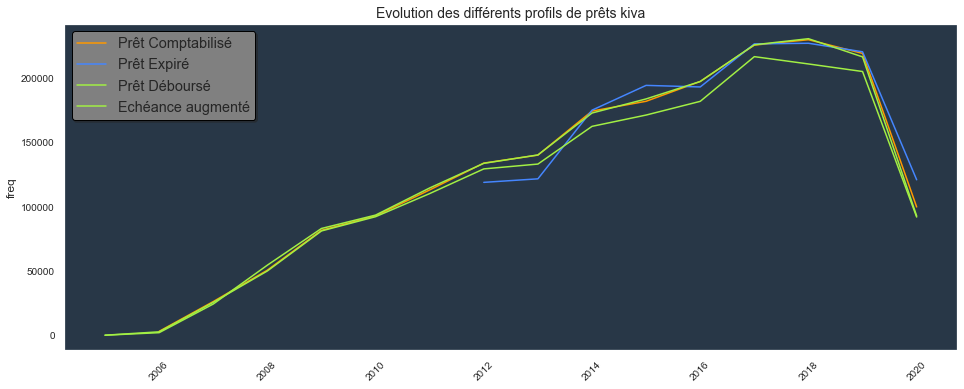

In [9]:
plt.figure(figsize=(16,6))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':10,'ytick.labelsize':10})
plt.title("Evolution des différents profils de prêts kiva",fontsize = 14)
plt.xticks(rotation=45) # Rotating X tickts by 45 degrees
sns.lineplot(x = df1.index.values, y = df1['freq'] , color = '#ff9900' , label= 'Prêt Comptabilisé')
sns.lineplot(x = df2.index.values, y = df2['freq'] , color = '#4586ff' , label = 'Prêt Expiré')
sns.lineplot(x = df3.index.values, y = df3['freq'] , color = '#a2ef44' , label = 'Prêt Déboursé')
sns.lineplot(x = df4.index.values, y = df4['freq'] , color = '#a2ef44' , label = 'Echéance augmenté')
plt.legend(facecolor= 'grey' , fontsize='large' , edgecolor = 'black' ,shadow=True) # Legend formatting
plt.show()

De cette sortie, on a retrace ainsi les activités de Kiva de sa création en 2005 jusqu'au 20/10/2020. On constate l'année 2018 représente celle où kiva a eu le plus grand nombre d'activité pour tous ces profils de prêts. Toutes fois, il importe de noter que la crise du covid a significativité impacté négativement les activités de kiva.

* Variables catégorielle

In [8]:
var_categoriel = ['LOAN_NAME','ORIGINAL_LANGUAGE','DESCRIPTION','DESCRIPTION_TRANSLATED','STATUS','ACTIVITY_NAME','SECTOR_NAME','LOAN_USE','COUNTRY_CODE','COUNTRY_NAME','TOWN_NAME','CURRENCY_POLICY','CURRENCY_EXCHANGE_COVERAGE_RATE','CURRENCY','TAGS','BORROWER_NAMES','BORROWER_GENDERS','BORROWER_PICTURED','REPAYMENT_INTERVAL','DISTRIBUTION_MODEL']
loan[var_categoriel] = loan[var_categoriel].astype('category')

In [13]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968819 entries, 0 to 1968818
Data columns (total 38 columns):
 #   Column                           Dtype              
---  ------                           -----              
 0   LOAN_ID                          int64              
 1   LOAN_NAME                        category           
 2   ORIGINAL_LANGUAGE                category           
 3   DESCRIPTION                      category           
 4   DESCRIPTION_TRANSLATED           category           
 5   FUNDED_AMOUNT                    float64            
 6   LOAN_AMOUNT                      float64            
 7   STATUS                           category           
 8   IMAGE_ID                         float64            
 9   VIDEO_ID                         float64            
 10  ACTIVITY_NAME                    category           
 11  SECTOR_NAME                      category           
 12  LOAN_USE                         category           
 13  COUNTRY_CODE

Une fois que nous connaissons le type de nos différentes variables, nous allons par suite identifier celles qui ne serons
pas utiles pour nos analyses et les supprimés pour ne retenir que les pertinentes. Comme par exemple, les variables `ACTIVITY_NAME` ne rapporte pas trop d'information étant donnée la disponibilité de la variable `SECTOR_NAME`; également pour la variable `IMAGE_ID`, on va préferé `BORROWER_PICTURED` qui renseigne si l'emprunteur a fourni sa photo ou pas.

In [9]:
var_suprime = ['LOAN_NAME','ORIGINAL_LANGUAGE','IMAGE_ID','DESCRIPTION','ACTIVITY_NAME','TOWN_NAME','CURRENCY_POLICY','TAGS','BORROWER_NAMES']

In [10]:
loan_copy = loan.copy() # On fait copie de la base pour toujours avoir recours à la base source en cas de problème.

In [11]:
loan_copy = loan_copy.drop(var_suprime, axis=1)

In [13]:
loan_copy.shape

(1968819, 29)

## Analyse globale de la base de donnée
L'object de cette partie est de ressortie les caractéristiques globales de la base de données en terme de missing values et duplicates. Par la suite, nous allons procédé à une analyse beaucoup plus fine au niveau de chaque de variable, ce dans l'optique d'identifier les valeurs éventuelles valeurs abérrantes et autres.

* Missing values

<AxesSubplot:>

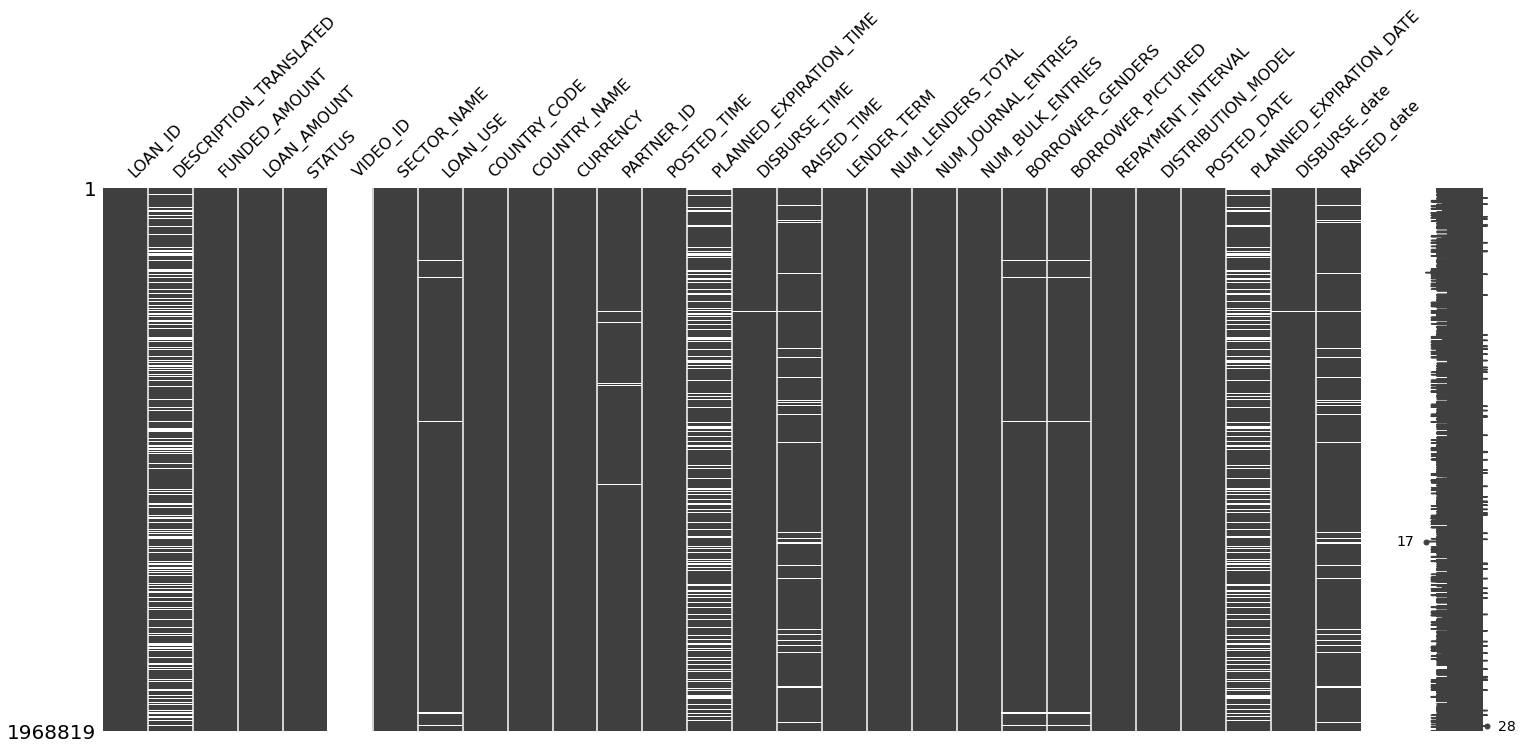

In [60]:
msno.matrix(loan_copy)

L'observation de cette sortie permet de constater que les variables `DESCRIPTION_TRANSLATED`, `VIDEO_ID`, `PLANNED_EXPIRATION_TIME`, `PLANNED_EXPIRATION_DATE`
presentent beaucoup de valeurs manquantes. Etant donné leur faible apport informationnel dans nos analyses,
nous allons nous en débarraser. Par ailleurs, notons aussi le cas de la variable **`CURRENCY_EXCHANGE_COVERAGE_RATE`** qui certe importante pour les analyses mais présente des valeurs manquantes. Pour cette dernière, nous allons la supprimer de la base de donnée et la remplacer par une variable avec un plus grand apport informationnel.En effet, dans la suite du travail, nous allons rechercher un site qui donne les taux d'échanges des différentes monnaies par rapport à l'euro et scrapper cette page pour ajouter cette information à notre base de donnée.

In [14]:
var_supprime2 = ['DESCRIPTION_TRANSLATED','CURRENCY_EXCHANGE_COVERAGE_RATE','VIDEO_ID','PLANNED_EXPIRATION_TIME','PLANNED_EXPIRATION_DATE']

In [15]:
loan_copy = loan_copy.drop(var_supprime2, axis=1)

<AxesSubplot:>

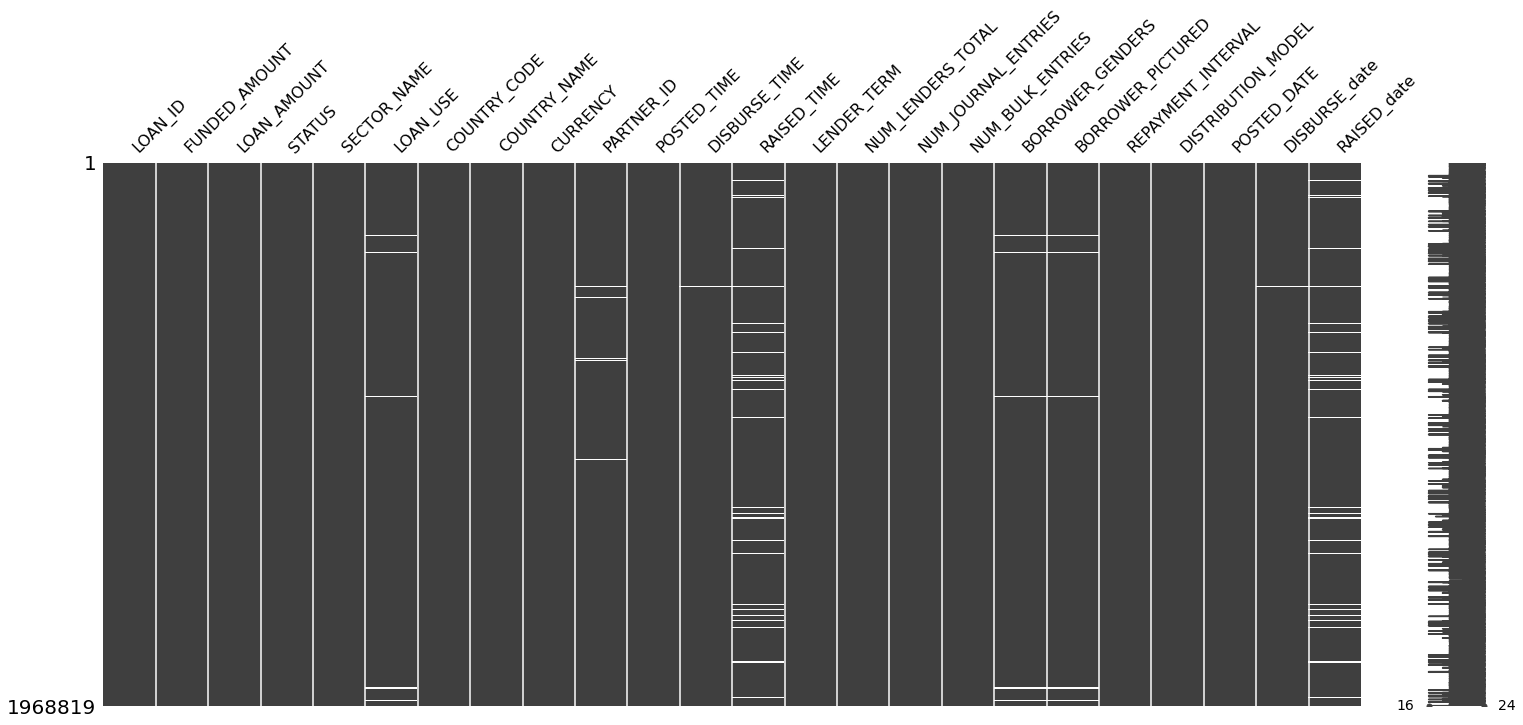

In [63]:
msno.matrix(loan_copy)

* Duplicates

In [16]:
## Nombre de données dupliqués sur la base des id
loan_copy.duplicated(subset=['LOAN_ID' ]).sum()

0

Ainsi, on voit que notre base de données ne comporte pas d'observations dupliquées. Autrement dit, chaque prêt est identifiable par son identifiant.

## Analyses spécifiques des variables
Dans cette partie, nous allons procéder aux éventuelles recodifications, renomages et traitement des variables qui présentent des incohérences. Dans un premier temps, nous allons nous intéresser aux variables catégorielles, par suite nous mettrons le focus sur les variables quantitatives.

### Traitement des variables qualitatives


In [184]:
loan_copy.columns

Index(['LOAN_ID', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS', 'SECTOR_NAME',
       'LOAN_USE', 'COUNTRY_CODE', 'COUNTRY_NAME', 'CURRENCY', 'PARTNER_ID',
       'POSTED_TIME', 'DISBURSE_TIME', 'RAISED_TIME', 'LENDER_TERM',
       'NUM_LENDERS_TOTAL', 'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL', 'POSTED_DATE', 'DISBURSE_date', 'RAISED_date',
       'taux_euro_x', 'verif', 'taux_euro_y', 'col'],
      dtype='object')

In [17]:
var_categoriel = ['STATUS','SECTOR_NAME','LOAN_USE','COUNTRY_NAME','CURRENCY','LENDER_TERM','BORROWER_GENDERS','BORROWER_PICTURED','REPAYMENT_INTERVAL','DISTRIBUTION_MODEL']

* ***Status du prêt*** : 
Cette variable représente la variable centrale de l'étude, car c'est elle que l'on cherchera à expliquer par la suite grâce aux modèles prédictifs que l'on mettra en oeuvre. De ce fait en accord avec la partie revue de littérature, après avoir présenté quelques statistiques brèves sur cette dernière, nous allons la recodifier tel que précédemment indiqué.

In [18]:
pd.crosstab(loan_copy.STATUS,'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
STATUS,
expired,4.61
fundRaising,0.56
funded,94.37
refunded,0.45


On voit bien que les prêts remboursés représentent l'origine de l'activité de kiva. En effet, ces derniers représentent `94,37%` des prêts de la structure. Le taux de défaut des clients de kiva sur la période d'étude est de `4,61%`. Ainsi, dans la partie modélisaiton afin de construire nos modèles prédicitfs sur cette variable, nous adopterons un comportment bien précis et concis en adéquation avec les études réalisées dans ce cas de figure.

Comme enseignement de la revue, nous allons à présent recodifier cette variable à fin d'avoir les entrepreneurs ayant fait défaut et ceux qui ne sont pas dans cette situation.

In [19]:
loan_copy['target'] = np.where(loan_copy['STATUS'] == 'expired', 0, 1)

In [20]:
labels = { 0 : 'defaut', 1 : 'succes'}
loan_copy['target'].apply(labels.get)
pd.crosstab(loan_copy['target'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
target,
0,4.61
1,95.39


Le taux de défaut global des entreprunteurs de kiva est de `4,61%`. Par la suite nous allons tirer un échantillon dans le groupe des entrepreneurs à succès pour construire les différents modèles.

* Secteur d'activité : 

In [21]:
print('Nous avons au total', len(loan_copy.SECTOR_NAME.unique()), " différentes secteurs d'activités supportées par le financement de la kiva",
     "\n En termes d'activités impactées par kiva, elles sont au nombres de : ",len(loan['ACTIVITY_NAME'].unique()),'activités.')

Nous avons au total 15  différentes secteurs d'activités supportées par le financement de la kiva 
 En termes d'activités impactées par kiva, elles sont au nombres de :  163 activités.


In [22]:
pd.crosstab(loan_copy['SECTOR_NAME'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
SECTOR_NAME,
Agriculture,25.47
Arts,2.02
Clothing,5.43
Construction,1.22
Education,3.50
Entertainment,0.13
Food,22.00
Health,1.42
Housing,5.26


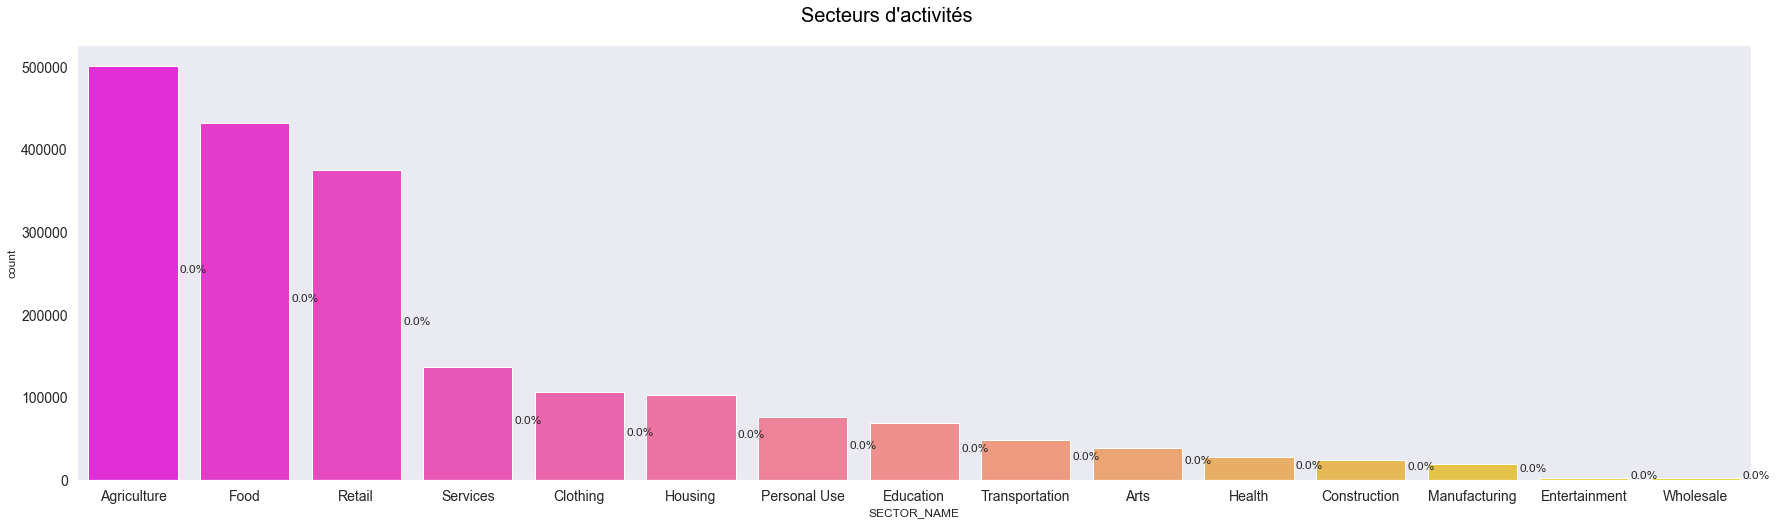

In [23]:
plt.figure(figsize=(30,8))
sns.set(rc={"axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
plt.gcf().text(.5, .93, "Secteurs d'activités", fontsize = 20, color='black' ,ha='center', va='center')
ax = sns.countplot(x=loan_copy['SECTOR_NAME'] , order =loan_copy['SECTOR_NAME'].value_counts().index , palette="spring")

total = len(loan_copy['SECTOR_NAME'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()


Etant donné que les pays sous-développés sont généralisé par la forte dépendance au secteur agricole, les données de kiva retrace parfaitement cette réalité. En effet, l'agriculture est le secteur d'activité le plus financé, à lui seul, il représente la destination de `25%` des prêts des entrepreneurs demandeurs de fonds à kiva. Ce dernier est sécondé par le secteur alimentaire qui représente prêt de `22%` des prêts de la structure. Le secteur manufacturié, du divertissement et des grossistes sont les moins représentés avec respectivement une part de `1,01%`, `0,13%` et `0,12%`.

Comme tenu du grand nombre de modalité de cette variable, nous allons la recoder. comme procédé de recodage, nous allons recoder tout en recherchant un équillibre au niveau des différentes modalités. Ainsi, les 3 modalités les plus représentatives seront laissées telles qu'elles ; les modalités `Clothing`; `Housing` et `Personnal Use` seront regroupées en la modalité `Bien_Menage`  et les autres variables serons dans la modalité autre.


In [24]:
Bien_Menage = ['Clothing','Housing','Personnal Use']
autre_secteur = ['Services','Education','Transportation','Arts','Health','Construction','Manufacturing','Entertainment','Wholesale']
conditions = [
    (loan_copy.SECTOR_NAME == 'Agriculture'),
    (loan_copy.SECTOR_NAME == 'Food'),
    (loan_copy.SECTOR_NAME == 'Retail'),
    (loan_copy.SECTOR_NAME == 'Clothing') | (loan.SECTOR_NAME == 'Housing') | (loan.SECTOR_NAME == 'Personal Use'),
    (loan_copy.SECTOR_NAME == 'Services') | (loan.SECTOR_NAME == 'Education') | (loan.SECTOR_NAME == 'Transportation') | (loan.SECTOR_NAME == 'Arts') | (loan.SECTOR_NAME == 'Health') | (loan.SECTOR_NAME == 'Services') | (loan.SECTOR_NAME == 'Construction') |  (loan.SECTOR_NAME == 'Manufacturing') | (loan.SECTOR_NAME == 'Entertainment') | (loan.SECTOR_NAME == 'Wholesale')
]
values = ['Agriculture','Food','Retail','Bien_Menage','autre_secteur']

In [25]:
loan_copy.SECTOR_NAME = np.select(conditions, values)

In [26]:
pd.crosstab(loan_copy['SECTOR_NAME'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
SECTOR_NAME,
Agriculture,25.47
Bien_Menage,14.57
Food,22.00
Retail,19.10
autre_secteur,18.87


In [83]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [84]:
import squarify

Text(0.5, 1.0, 'Distribution of sectors')

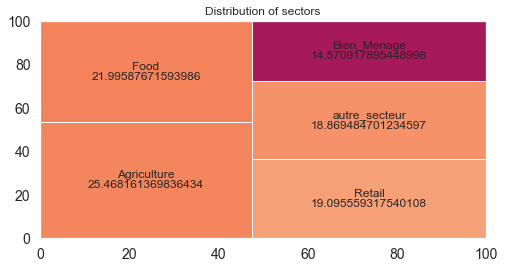

In [92]:
plt.figure(figsize=(8,4))
count = loan_copy['SECTOR_NAME'].value_counts()
squarify.plot(sizes=count.values,label=count.index, value=100*(count.values/len(loan_copy['SECTOR_NAME'])))
plt.title('Distribution of sectors')

* **Monnaie utilisé** : 
Comme observé dans la partie analyse globale, la variable `taux de change` de la base de donnée présentait beaucoup de valeurs manquantes et ne repoindaient pas à nos attentes. Ainsi, nous avions opté de la supprimer. Nous allons ici completer notre base de donnée avec une variable taux d'échange qui sera issu d'une opération de webscrapping sur une page web. Lors de ce processus de recupération des informations online et del'ajout des ces derniers à notre base de donnée, nous allons explorer la variable `currency` en corrigeant les éventuelles erreures sur cette dernière.

#### conversion de la monnaie en euro
Dans l'optique de disposer de la variable taux d'échange qui nous permettra la conversion de toutes les monnaies présentes en **`euro (€)`** , nous faisons le scraping sur ce site: https://www.xe.com/en/currencytables/?from=EUR et utilisons `BeautifulSoup`pour avoir "comprendre" le texte ainsi scrappé.

In [27]:
#pip install bs4
import urllib
import bs4
from urllib import request

In [28]:
url = 'https://www.xe.com/en/currencytables/?from=EUR'

In [29]:
request_text = request.urlopen(url).read()
page = bs4.BeautifulSoup(request_text, 'lxml')
#print(page.prettify())

tableau = page.find('div', class_='historicalRateTable-wrap')
#print(tableau)

# Récupération des abréviations des différentes monnaies
CURRENCY = []
for currency in tableau.tbody.findAll('tr'):
    CURRENCY.append(currency.a.text)

In [30]:
# Récuration des taux de convertions
exchange = []
for taux in tableau.tbody.findAll('tr'):
    exchange.append(taux.find('td',class_='historicalRateTable-rateHeader').text)

In [31]:
#Assemblement de ces listes dans le tableau final
result_currency = pd.DataFrame(columns=['CURRENCY','taux_euro'])
result_currency['CURRENCY'] = CURRENCY
result_currency['taux_euro'] = exchange
result_currency.head()

,CURRENCY,taux_euro
0,USD,1.2106786665
1,EUR,1.0000000000
2,GBP,0.9059114285
3,INR,89.3124844981
4,AUD,1.6347015689


In [32]:
## Ajout des variables à la base de donnée
currency_database = pd.unique(loan_copy['CURRENCY']).tolist()
print(' Le nombre totale de monnaie est de : ',len(CURRENCY),
     '\n Le nombre de monnaie présent dans notre base de donnée est :',len(currency_database),
     "\n On s'attend à avoir exactement <<", len(CURRENCY) - len(currency_database),">> monnaies qui ne sont pas dans les deux listes." )

 Le nombre totale de monnaie est de :  167 
 Le nombre de monnaie présent dans notre base de donnée est : 78 
 On s'attend à avoir exactement << 89 >> monnaies qui ne sont pas dans les deux listes.


In [33]:
len(list(set(CURRENCY) - set(currency_database))) # La taille de la différence entre les deux listes.

91

On constate qu'il y'a deux monnaies présentent dans notre base de données qui ne sont pas dans la liste complètes de monnaies. Ainsi, on présuppose
que ces dernieres ont été mal libelées. Identifions ces monnaies.

In [34]:
# Boucle pour identifier les libelés des monnnaies érronés.
currency_error = []
for i in currency_database:
    if i not in CURRENCY:
        currency_error.append(i)
        print(i)

SSP
ZMK


A l'observation de ces derniers, on peut supposer que `ZMK` correspond plutôt à `ZMW` qui est la monnaie de `Zambian Kwacha` sur le site de référence. Afin de s'affranchir
de toute confusion nous allons identifer les pays qui ont ces monnaies, se reférer à la table et parsuite les remplacer.

In [35]:
# Recherhe de l'index des pays ayant une monnaie mal renseignée
index_erreur = []
for j in range(len(loan_copy.COUNTRY_NAME)):
    for k in range(len(currency_error)):
        if currency_error[k] == loan_copy.CURRENCY[j]:
            index_erreur.append(loan_copy.COUNTRY_NAME[j])

In [36]:
pays_1 = index_erreur[0]
for i in range(len(index_erreur)):
    if index_erreur[i]!=pays_1:
        print('Les pays ayant un libelé de monnaie mal renseignés sont : ', 
              '\n * ',pays_1,
              '\n * ',index_erreur[i])
        break

Les pays ayant un libelé de monnaie mal renseignés sont :  
 *  South Sudan 
 *  Zambia


Ainsi, on voit bien que les deux pays pour lesquels les monnais on été mal libelés sont le `South Sudan` et la `Zambia`. Ainsi, on voit bien que la précédente inturtion était correcte. En outre il importe de souligné l'importance d'avoir fait ce travail, car si on supprimait ces pays, on devait impiété négativement sur la performance du modèle à mettre sur-pied.

Dans le site de référence, la monnaie du `South Sudan` est appelé `Sudanese Pound` et est abbrégé `SDG`. Par suite, dans notre base de donnée, nous allons effectuer les changements suivants sur la variable currency :
* `SSP` en `SDG`
* `ZMK` en `ZMW`

In [37]:
print("On vérifie si les libéles 'SDG' et 'ZMK' était déjà dans la liste de la base de données. :",
      '\n*  SDG in list : ', 'SDG' in currency_database,
     '\n*  ZMW in list : ', 'ZMK' in currency_database)

On vérifie si les libéles 'SDG' et 'ZMK' était déjà dans la liste de la base de données. : 
*  SDG in list :  True 
*  ZMW in list :  True


Ainsi on voit qu'effectivement les deux libélés étaient déjà présents dans la base de donnée, ces erreurs pourraient probablement avoir pour
origine une erreur de saisit. 

In [56]:
# Remplace les libelés de monnaie de la base donnée
loan_copy['CURRENCY'] = loan_copy['CURRENCY'].replace({'SSP': 'SDG', 'ZMK': 'ZMW'})

In [57]:
new_currency_database = pd.unique(loan_copy['CURRENCY']).tolist()

In [58]:
len(new_currency_database)

76

A ce niveau, on est bien certain que tous les libelés de monnaies présents dans la base de données le sont également dans le libelé au niveau internationnal.

Nous allons ajouter la base de donnée scrapper, contenant le taux de change des monnaies par rapport à l'euro à notre base de donnée.

In [59]:
# Conversion de la colonne new_currency_database en base de donnée
df1 = pd.DataFrame({'col':new_currency_database})
# Fusion des bases de données pour en retenir uniquement les monnaies des présentes dans la base de données
currency = pd.merge(result_currency, df1, how = 'right', left_on = ['CURRENCY'],right_on = ['col']).sort_values('CURRENCY')

In [60]:
# Ajout de la variable taux de change à la base de données
loan_copy = pd.merge(loan_copy, currency, on='CURRENCY', how='outer')

Maintenant que nous avons le taux de conversion des différentes monnaies à l'euro, nous allons diviser toutes les variables
concernant les montant libélé en monnaies nationales par l'euro. Rappelons que l'importance de démarche réside dans la facilité des
interprétations qu'elle procure. En outre, grâce à cette conversion, les interprétations, analyses et comparaisons serons beacoup
plus facilent et clairent.

* **L'utilisation du prêt** :

In [253]:
loan_copy['LOAN_USE'].unique()

['to buy more sacks of charcoal to sell.', 'to buy ingredients such as sugar, coconut mil..., 'to buy more supplies to improve her store.', 'to buy additional feed for her business.', 'to build a sanitary toilet for her family.', ..., 'to pay for stock of solar lights and cell pho..., 'to maintain a stock of solar lights and cell ..., 'to pay for a large solar system and delivery ..., 'purchase solar lighting products for sale to ..., 'To buy more clothes, blankets and other goods...]
Length: 1195466
Categories (1195465, object): ['to buy more sacks of charcoal to sell.', 'to buy ingredients such as sugar, coconut mil..., 'to buy more supplies to improve her store.', 'to buy additional feed for her business.', ..., 'to maintain a stock of solar lights and cell ..., 'to pay for a large solar system and delivery ..., 'purchase solar lighting products for sale to ..., 'To buy more clothes, blankets and other goods...]

* **Pays de destination du prêt** : 

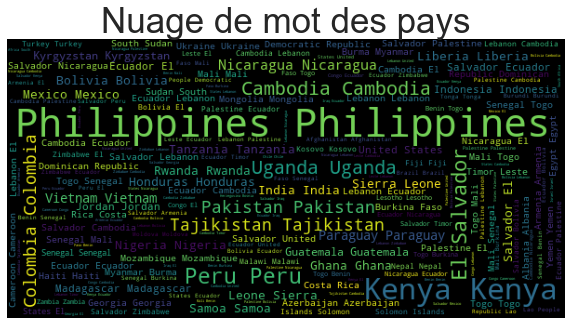

In [96]:
# pip install pip install WordCloud
from wordcloud import WordCloud

names = loan_copy["COUNTRY_NAME"][~pd.isnull(loan_copy["COUNTRY_NAME"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.title("Nuage de mot des pays", fontsize=35)
plt.axis("off")
plt.show() 

De cette sortie de nuage graphique, on voit clairement la `philippine` est le pays ayant le plus entrepreneur financé par kiva. Aussi, il apparait clairement que les pays tel que le `Kenya`, la `Colombie`, l'`Ouaganda`, `El salvador` ne sont pas en reste. Afin d'en avoir davantage d'informations, nous allons faire une représentation graphique avec les différentes proportions.

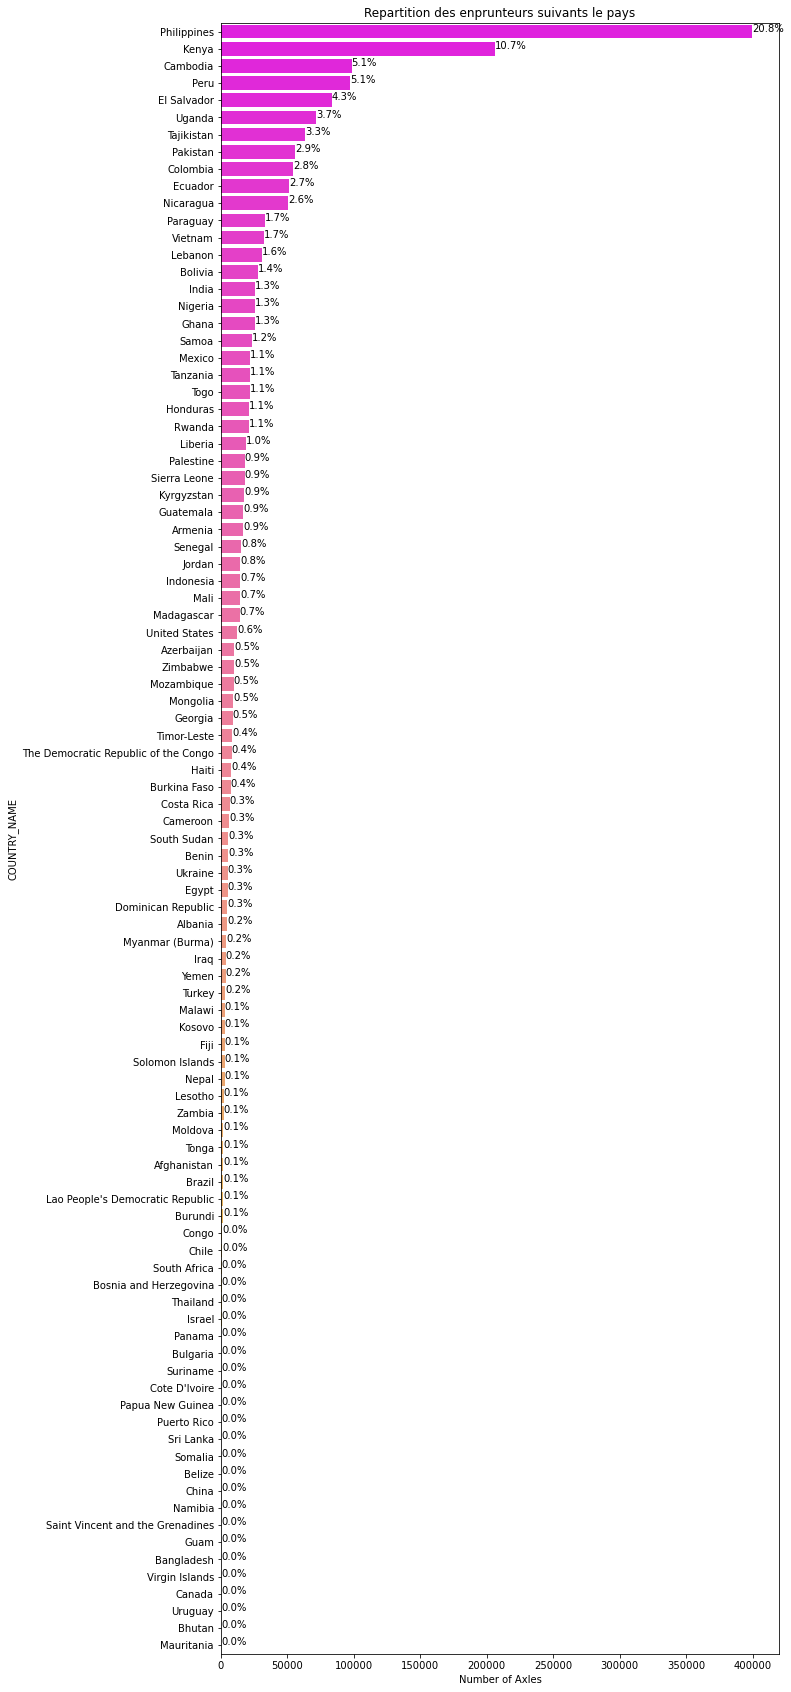

In [170]:
plt.figure(figsize=(10,30))
ax = sns.countplot(y="COUNTRY_NAME", data=loan_copy, order =loan_copy['COUNTRY_NAME'].value_counts().index , palette="spring")
#ax = sns.countplot(x=loan_copy['SECTOR_NAME'] )

plt.title('Repartition des enprunteurs suivants le pays')
plt.xlabel('Number of Axles')

total = len(loan_copy['COUNTRY_NAME'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

A l'observation de ce graphique, il en ressort que sur la période d'étude, l'activité de kiva à touché **`95 pays`**. Parmi ces pays, ceux ayant été les plus dynamiques sont `Philippines`, `Kenya`, `Cambodia`, `peru` et `El Salvador`. De ce fait,ces 5 pays sont les premiers ayant le plus grand nombre d'entrepreneurs qui ont kiva comme source de financement. Par suite, dans l'optique d'avoir une vision beaucoup plus de l'impact du travail de kiva, nous opté pour une présentation graphique beaucoup plus informative. En effet, nous nous donnons pour ambittion de faire une réprésentation spatiale des pays en utilisant leurs coordonnés géographiques (longitude, latitude). Cette représentation présente le fort intérêt de nous permettre de faire une recodification de la variable en continent, ainsi, elle pourra être pris en compte dans la modélisation. 

Pour parvenir à la réalisaiton de ce challenge, nous allons, dans un premier temps rechercher l'information en ligne sur les coordonnées géographiques des différents pays. Par suite, nous utiliserons les bibliothèques adéquates pour faire la représentation graphique. Les informations à scrapper sont disponible à l'adresse suivante : https://developers.google.com/public-data/docs/canonical/countries_csv.

In [41]:
url_pays = 'https://developers.google.com/public-data/docs/canonical/countries_csv'
request_text = request.urlopen(url_pays).read()
pays = bs4.BeautifulSoup(request_text, 'lxml')
#print(pays.prettify())

In [42]:
tab_pays = pays.find('div', class_='devsite-article-body clearfix').table
#print(tab_pays)

In [43]:
code = []
lat = []
long = []
for l in tab_pays.findAll('tr'):
    code.append(l.text.split('\n')[1])
    lat.append(l.text.split('\n')[2])
    long.append(l.text.split('\n')[3])

In [44]:
#Assemblement de ces listes dans le tableau final
data_pays = pd.DataFrame(columns=['code_pays','latitude','longitude'])
data_pays['code_pays'] = code[1:]
data_pays['latitude'] = lat[1:]
data_pays['longitude'] = long[1:]
data_pays.head()

,code_pays,latitude,longitude
0,AD,42.546245,1.601554
1,AE,23.424076,53.847818
2,AF,33.93911,67.709953
3,AG,17.060816,-61.796428
4,AI,18.220554,-63.068615


In [45]:
# On recherche si l'ensembles des codes des pays dans la base de donnée sont correctes
code_db = loan_copy['COUNTRY_CODE']
code_pb = []
for i in code_db:
    if i not in code:
        code_pb.append(i)


In [46]:
used = []
unique = [used.append(x) for x in code_pb if x not in used]
used

['SS', nan]

On constate bien que les valeurs de codes pays ne figurent pas dans la liste des codes de pays sont les valeurs manquantes (`nan`) et le code `SS`. Pour les valeurs manquantes, nous allons vérifier si nous avons de l'information sur le pays de ces derniers et les imputer par le code correspondant, le cas échéant ils seront tout simplement supprimé de la base de donnée. Concernant le code `SS` nous soupçonnons qu'il s'agit du code du `Soudan du Sud`.

In [47]:
print('le pays ayant un code pays SS est : ', loan_copy.query('COUNTRY_CODE == "SS"')['COUNTRY_NAME'].unique())

le pays ayant un code pays SS est :  ['South Sudan']
Categories (1, object): ['South Sudan']


In [48]:
print(" Le pays pour lequel le code n'est pas renseigné est : ",loan_copy[loan_copy['COUNTRY_CODE'].isna()]['COUNTRY_NAME'].unique(),
      "\n Le nombre de valeurs manquantes de la variable nom du pays est : ",loan_copy[loan_copy['COUNTRY_NAME'].isna()].shape[0])

 Le pays pour lequel le code n'est pas renseigné est :  ['Namibia']
Categories (1, object): ['Namibia'] 
 Le nombre de valeurs manquantes de la variable nom du pays est :  0


In [49]:
# Imputation du code pays
loan_copy['COUNTRY_CODE'] = np.where(loan_copy['COUNTRY_CODE'] == 'SS','SD',loan_copy['COUNTRY_CODE'])
loan_copy['COUNTRY_CODE'] = np.where(loan_copy['COUNTRY_CODE'].isna(),'NA',loan_copy['COUNTRY_CODE'])

In [50]:
code_pays_dbase = pd.unique(loan_copy['COUNTRY_CODE']).tolist()
nom_pays_dbase = pd.unique(loan_copy['COUNTRY_NAME']).tolist()
# Conversion de la colonne new_currency_database en base de donnée
df_code = pd.DataFrame({'COUNTRY_CODE':code_pays_dbase, 'COUNTRY_NAME':nom_pays_dbase})
# Fusion des bases de données pour en retenir uniquement les monnaies des présentes dans la base de données
COORD_GEO = pd.merge(data_pays, df_code, how = 'right', left_on = ['code_pays'],right_on = ['COUNTRY_CODE']).sort_values('COUNTRY_CODE')

La représentation spaciale de nos différentes données nécessite l'installation du package **`cartopy`** qui lui dépend de l'installation de la dernière version du package **`Proj`**. Selon les informations sur le site qui documente l'installation de ce package (disponible à cet adresse : https://proj.org/install.html), le fonctionnement de ce package sous windows dépend de l'installation dans l'ordinateur d'un logiciel tiers dénommé `OSGeo4W`. 
Les étapes d'installation et le setup de ce logiciel sont disponible à l'addresse susmentionné. De façon spécifique, après le téléchargement du logiciel, la série d'étapes à suivre est la suivante :
Téléchargez le programme d'installation 32 bits ou 64 bits.
* Exécutez le programme d'installation OSGeo4W.
* Sélectionnez «Installation avancée» et appuyez sur Suivant.
*  Sélectionnez «Installer depuis Internet» et appuyez sur Suivant.
*  Sélectionnez un répertoire d'installation. La suggestion par défaut convient dans la plupart des cas. Appuyez sur Suivant.
*  Sélectionnez «Répertoire local du package». La suggestion par défaut convient dans la plupart des cas. Appuyez sur Suivant.
*  Sélectionnez «Connexion directe» et appuyez sur Suivant.
*  Choisissez le serveur download.osgeo.org et appuyez sur Suivant.
*  Recherchez «proj» sous «Commandline_Utilities» et cliquez sur le package dans la colonne «Nouveau» jusqu'à ce que la version que vous souhaitez installer apparaisse.
*  Appuyez sur suivant pour installer PROJ.

In [51]:
pip install cartopy

  Using cached Cartopy-0.18.0.tar.gz (14.4 MB)
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\pc\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\pc\\AppData\\Local\\Temp\\pip-install-362v66vy\\cartopy\\setup.py'"'"'; __file__='"'"'C:\\Users\\pc\\AppData\\Local\\Temp\\pip-install-362v66vy\\cartopy\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\pc\AppData\Local\Temp\pip-pip-egg-info-qxxmx0ma'
         cwd: C:\Users\pc\AppData\Local\Temp\pip-install-362v66vy\cartopy\
    Complete output (5 lines):
    C:\Users\pc\AppData\Local\Temp\pip-install-362v66vy\cartopy\setup.py:104: UserWarning: Unable to determine GEOS version. Ensure you have 3.3.3 or later installed, or installation may fail.
      warnings.warn(
    C:\Users\pc\AppData\Local\Temp\pip-install-362v66vy\cartopy\setup.py:157: UserWarning: Unable to det

In [6]:
#pip install proj
#pip install pyproj
#!pip install cython  
#!pip install cartopy  
!pip install OSGeo4W

ERROR: Could not find a version that satisfies the requirement OSGeo4W (from versions: none)
ERROR: No matching distribution found for OSGeo4W


In [52]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature, COLORS
import math
resolution = "50m"
BORDERS = NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land',
                              resolution, edgecolor='black', facecolor='none')
STATES = NaturalEarthFeature('cultural', 'admin_1_states_provinces_lakes',
                             resolution, edgecolor='black', facecolor='none')
COASTLINE = NaturalEarthFeature('physical', 'coastline', resolution,
                                edgecolor='black', facecolor='none')
LAKES = NaturalEarthFeature('physical', 'lakes', resolution,
                            edgecolor='face',
                            facecolor=COLORS['water'])
LAND = NaturalEarthFeature('physical', 'land', resolution,
                           edgecolor='face',
                           facecolor=COLORS['land'], zorder=-1)
OCEAN = NaturalEarthFeature('physical', 'ocean', resolution,
                            edgecolor='face',
                            facecolor=COLORS['water'], zorder=-1)
RIVERS = NaturalEarthFeature('physical', 'rivers_lake_centerlines', resolution,
                             edgecolor=COLORS['water'],facecolor='none')

annee = [1995,2000,2005,2010,2014]
x,y= np.array(df1['Longitude']), np.array(df1['Latitude'])
fig = plt.figure(figsize=(20,15))
for i in range(len(annee)):
    ax = fig.add_subplot(3, 2, i+1, projection=ccrs.PlateCarree())
    ax.add_feature(BORDERS)
    ax.add_feature(LAKES)
    ax.add_feature(LAND)
    ax.add_feature(OCEAN)
    ax.add_feature(RIVERS)
    ax.add_feature(COASTLINE)
    local = "ts" + str(annee[i])
    if max(df1[local])<=1:
        plt.scatter(x, y,s=df1[local]*200, c=df1[local], alpha=0.5)
    elif max(df1[local])<=10:
        plt.scatter(x, y,s=df1[local]*70, c=df1[local], alpha=0.5)
    else:
        plt.scatter(x, y,s=df1[local]*15, c=df1[local], alpha=0.5)
    plt.colorbar()
    ax.set_title("Taux de suicide en"+':'+str(annee[i]) + " pour l'UE")
        

ModuleNotFoundError: No module named 'cartopy'

* **Sexe de l'emprunteur**

In [42]:
len(pd.unique(loan_copy['BORROWER_GENDERS']))

24167

On constate que la variable sexe a 24 167 modalités. Nous allons comprendre cette erreur et la corriger car cette variable a un grand pouvoir informationnel.

In [36]:
pd.crosstab(loan_copy['BORROWER_GENDERS'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
BORROWER_GENDERS,
female,63.525647
"female, female",1.401906
"female, female, female",1.400332
"female, female, female, female",1.080292
"female, female, female, female, female",1.076077
...,...
"male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male",0.000051
"male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male",0.000102
"male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, female, male, male, male",0.000051


In [45]:
pd.crosstab(loan_copy['BORROWER_GENDERS'].isna(),'freq')

col_0,freq
BORROWER_GENDERS,
False,1923203
True,45616


Pour cette variable, nous avons 45 616 observations non renseignées. Etant donnée la distribution des erreurs au niveau des observations renseignées, nous soupçonnons que ces dernieres doivent contenir de l'information sur le mécanisme générateur des valeurs manquantes. Ainsi, pour bien comprendre ce mecanisme générateur de ces valeurs manquantes et les erreurs sur les modalités de cette variable, nous d'abord procéder à une bonne visualisation beaucoup plus large de cette variable.

In [63]:
# Configuration pour permettre l'affichage de plusieurs lignes
pd.set_option('display.max_rows', None)

In [66]:
loan_copy['BORROWER_GENDERS'][:100]

0                                                female
1                                                female
2                                                female
3                                                female
4                                                  male
5                                                  male
6                                                female
7                                                female
8                                                female
9                        female, female, female, female
10                                               female
11                                               female
12                                               female
13                                               female
14    female, female, female, female, female, female...
15                               female, female, female
16                                               female
17                   female, female, male, femal

In [67]:
pd.reset_option('^display.', silent=True) # Remet l'option d'affichage par défaut

Comme on peut le voir avec cette sortie, les soupçons précédement émis s'avèrent fausses. En effet, les observations autour de la valeurs manquantes sont très bien renseignées. Ceci ne nous renseigne pas spécifiquement sur l'origine de ces dernieres. Ainsi, par suite, nous allons les supprimer par manque d'informations additionnelles pour procéder à une éventuelle imputation. En outre, concernant les observations renseignées, ces derniers aussi posent un problème. En effet, comme on peut l'observer à les lignes `17`, `23` et `54`, une observation erronée contient à la fois la modalité **homme** et **femme**. Afin d'être cohérent dans notre démarche, nous allons uniquement retenir la première occurence. C'est à dire pour l'observation les observations susmentionnées, nous allons en retenir respectivement : `female`, `male`, `male`.

Nous allons dans la suite, dans un premier temps supprimer les observations ayant les valeurs manquantes pour la variable `Gender` sur la base totale. Ensuite, nous  allons procéder à la correction des modalités de cette variable.

In [115]:
# Suppression des missings values
loan_copy = loan_copy.dropna(how='all', subset=['BORROWER_GENDERS'])

In [116]:
sexe = loan_copy['BORROWER_GENDERS'].tolist()
len(sexe); sexe[0].split(',')[0]

'female'

In [118]:
# Boucle qui permet de recupérer le premiere la premiere occurence de chaque modalité
sexe_correct = []
for i in range(len(sexe)):
    sexe_correct.append(sexe[i].split(',')[0])

In [120]:
loan_copy['BORROWER_GENDERS'] = sexe_correct

In [121]:

print(' Le nombre de modalité de la variable obtenu est de : ',len(loan_copy['BORROWER_GENDERS'].unique()),
      "\n Le nombre d'observation de la variable est de :  ",len(loan_copy['BORROWER_GENDERS']))

 Le nombre de modalité de la variable obtenu est de :  3 
 Le nombre d'observation de la variable est de :   1923203


In [126]:
pd.crosstab(loan_copy['BORROWER_GENDERS'],'freq')

col_0,freq
BORROWER_GENDERS,
female,1474910
male,448257
unspecified,36


Comme on peut le constater, il y'a encore une modalité incorrecte à savoir `unspecified`. Nous allons encore supprimer toutes les observation de la base de donnée correspond à cette observation.

In [128]:
loan_copy.drop(loan_copy.index[loan_copy['BORROWER_GENDERS'] == 'unspecified'], inplace = True)

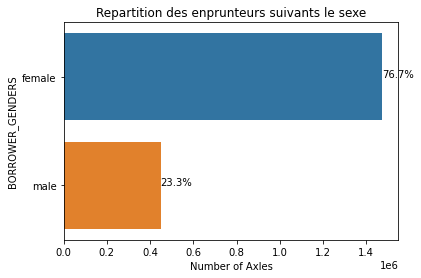

In [134]:
ax = sns.countplot(y="BORROWER_GENDERS", data=loan_copy)
plt.title('Repartition des enprunteurs suivants le sexe')
plt.xlabel('Number of Axles')

total = len(loan_copy['BORROWER_GENDERS'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Comme l'illustre cette sortie graphique, on voit bien que la plupart des entrepreneurs des pays sous dévéloppés qui empruntent des fonds d'investissements chez kiva sont les femmes. Ceci est en parfaite adéquation avec les résultats du secteur d'activités où il en est ressorti que le secteur le plus impacté par les prêts par les prêts de kiva est le `secteur agricole`. Car, dans ces pays, les femmes sont généralement plus présentes dans le secteur agricole.

* **La photo de l'emprunteur est elle disponible ?**

In [136]:
pd.crosstab(loan_copy['BORROWER_PICTURED'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1)

col_0,freq
BORROWER_PICTURED,
"false, false, false, true, true, true, true, true, false, true, true, false, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, false, true, true, true, true, true, true, true, true, true, false, true, true, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, true, false, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, false, true, true, true, false, false, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000052
...,...
"true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000156
"true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000104
"true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000468


Nous sommes encore confronté à la même difficulté que précédemment. Cette variable sera très importante pour notre modèle de prédiction, car elle permettra de savoir si le fait pour un entrepreneur de donner sa photo est gage de bonne conduite de sa part. Ainsi, nous allons nous attelé à corriger cette variables avec les considérations précédemment énoncées. A savoir ne retenir que les premières occurences des modalités et étandre la suppression des missings values à toute la base de donnée.

In [ ]:
loan_copy['BORROWER_PICTURED']

In [115]:
# Suppression des missings values
loan_copy = loan_copy.dropna(how='all', subset=['BORROWER_GENDERS'])

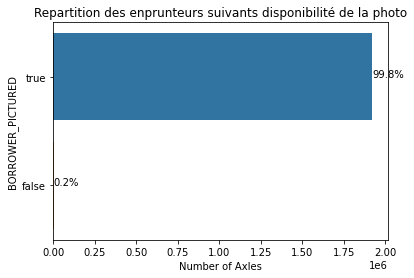

In [150]:
photo = loan_copy['BORROWER_PICTURED'].tolist()
# Boucle qui permet de recupérer le premiere la premiere occurence de chaque modalité
photo_correct = []
for i in range(len(photo)):
    photo_correct.append(photo[i].split(',')[0])

loan_copy['BORROWER_PICTURED'] = photo_correct

ax = sns.countplot(y="BORROWER_PICTURED", data=loan_copy)
plt.title('Repartition des enprunteurs suivants disponibilité de la photo')
plt.xlabel('Number of Axles')

total = len(loan_copy['BORROWER_PICTURED'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Comme illsutré par le graphique, seulement `0,2%` des emprunteurs de kiva n'ont pas envoyer de photo leur photo. Ainsi, on peut déjà présumé que cette variable ne serait pas un bon prédicteur car ne permet pas de discriminer les profils des defauts et bons des entrepreneurs. Toutes fois dans la suite, des analyses appropriées seront menées à cette fin.

* **Intervalle de remboursement**

In [162]:
pd.crosstab(loan_copy['REPAYMENT_INTERVAL'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
REPAYMENT_INTERVAL,
bullet,9.07
irregular,4.34
monthly,86.58


Les prêts de kiva sont le plus fréquemment remboursé à intervalle mensuels, soit `86,58%`. La modalité **`bullet`** représente les autres types de remboursement à fréquence régulières qui ne sont pas mensuels. Et ces derniers sont effectués par `9,07%` des entrepreneurs.

* **Model de distribution du prêt** : 
Il est important de noter que pour bénéficier d'un prêt en provenance de kiva, soit l'entrepreneur fait recours à une structure partenaire, soit elle demande directement auprès de l'organisation. Ainsi, cette variable permet de capter le moyen d'obtention du prêt.

In [163]:
pd.crosstab(loan_copy['DISTRIBUTION_MODEL'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
DISTRIBUTION_MODEL,
direct,1.03
field_partner,98.97


Comme l'illustre cette sortie, la presque totalité des prêts occtroiyés par kiva sont faits par leurs strutures partenaires qui sont présents qu niveau local dans l'ensmebles des pays membres.

## Traitement des variables quantitatives

Pour chacune de ces variables, nous identifierons s'il s'agit d'un montant en unité monétaire ou pas. Cette connaissance nous ai fondalement car grâce à elle, on saura si une conversion de la dite variable en `euro` est nécessaire.

In [77]:
#,'LENDER_TERM'
var_quanti = ['FUNDED_AMOUNT','LOAN_AMOUNT','NUM_LENDERS_TOTAL','NUM_JOURNAL_ENTRIES','NUM_BULK_ENTRIES']
var_date = ['POSTED_DATE', 'DISBURSE_date', 'RAISED_date']

#### Convertion variables monétaires en euro
les variables à convertir en monnaie sont : Funded amount, Loan amount. Pour la conversion, nous allons diviser chacune de ces variable par le taux en euro. En effet, ces taux ont été pris au certain. C'est-à-dire, que combien d'unités de ces monnaies seront nécessaires pour obetenir un euro.

In [68]:
loan_copy['FUNDED_AMOUNT'] = (pd.to_numeric(loan_copy['FUNDED_AMOUNT'])/pd.to_numeric(loan_copy['taux_euro']))
loan_copy['LOAN_AMOUNT'] = (pd.to_numeric(loan_copy['LOAN_AMOUNT'])/pd.to_numeric(loan_copy['taux_euro']))

In [78]:
loan_copy[var_quanti].describe() # Description des variables quantitatives de la base de données.

,FUNDED_AMOUNT,LOAN_AMOUNT,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES
count,1.968819e+06,1.968819e+06,1.968819e+06,1.968819e+06,1.968819e+06
mean,1.991206e+02,2.144875e+02,2.142341e+01,1.561344e+00,1.153008e+00
std,9.945743e+02,1.031158e+03,4.155283e+01,1.093998e+00,5.257283e-01
min,0.000000e+00,8.888968e-04,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.168829e+00,1.298699e+00,7.000000e+00,1.000000e+00,1.000000e+00
50%,4.713922e+00,5.002049e+00,1.400000e+01,1.000000e+00,1.000000e+00
75%,8.613394e+01,9.491554e+01,2.600000e+01,2.000000e+00,1.000000e+00
max,4.129915e+05,4.129915e+05,1.526500e+04,1.260000e+02,6.300000e+01


Les princiaples enseingnements du tableau :
  * **FUNDED_AMOUNT** : 
La moyenne des montants empruntés auprès de kiva durant la période d'analyse est de **`199,12€`**. Cette moyenne n'est pas représentative de cette série. En effet, l'écart type y est de **`994,57€`** ce qui donne un coefficient de variation très élevé de l'ordre de **`450%`**. Sur cette période d'analyse, la maximum de montant emprunté est de **`412 991,5€`**. 

* **LOAN_AMOUNT** : 
S'agissant du montant des prêts accordés, la moyenne de cette série durant la période d'analyse est de **`214,87€`**. Comme précédemment observé, cette moyenne n'est pas représentative de cette série. En effet, l'écart type y est de **`1 031,15€`** ce qui donne un coefficient de variation très élevé. Sur cette période d'analyse, la maximum de montant emprunté est de **`412 991,5€`**.

* **NUM_LENDERS_TOTAL** :
Le nombre total de prêteur pour l'octroie d'un prêt à un entrepreneur est en moyenne de **`21`** prêteurs. Toutes fois, il importe de noter que certains prêts de kiva ont mobilisé jusqu'à **`1 527`** prêteurs. Ceci semble tout à fait correct étant donné que le montant minimal pour pouvoir prêter via kiva est de **`25€`** et l'observation de la varibale montant de prêt emprunté en dit long sur la struture des prêts.

    Il est important de souligner que cette sortie permet aussi de confirmer les précédements, notamment que ces varibales ne présentent pas de valeurs manquantes.

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


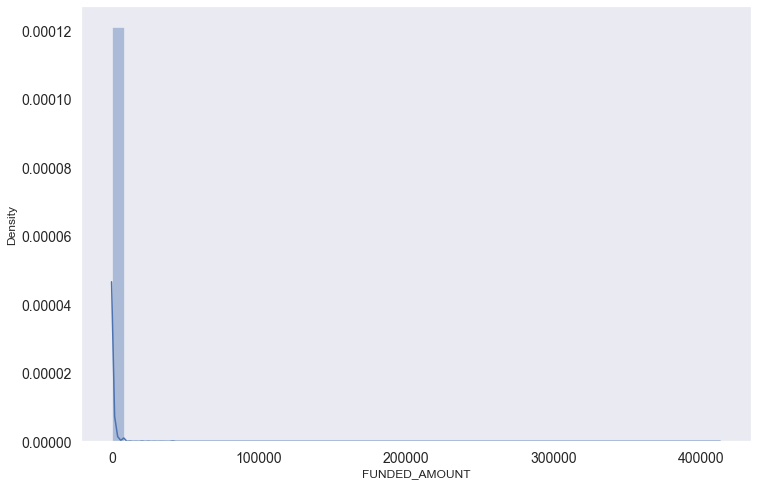

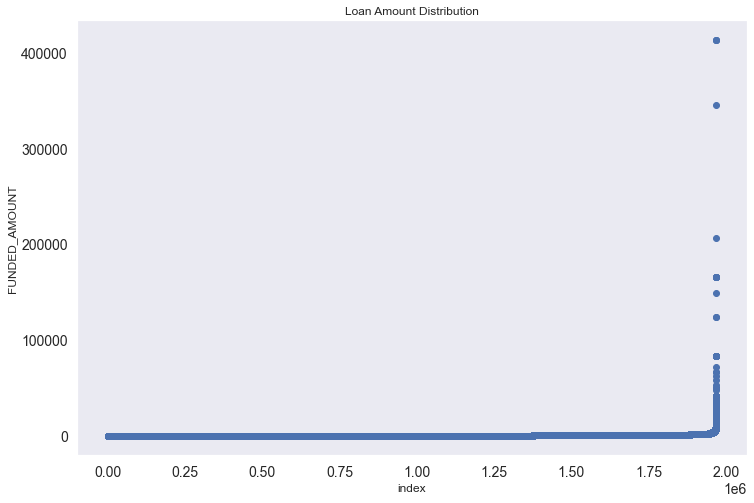

In [81]:
plt.figure(figsize = (12, 8))

sns.distplot(loan_copy['FUNDED_AMOUNT'])
plt.show() 
plt.figure(figsize = (12, 8))
plt.scatter(range(loan_copy.shape[0]), np.sort(loan_copy.FUNDED_AMOUNT.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('FUNDED_AMOUNT', fontsize=12)
plt.title("Loan Amount Distribution")
plt.show()

# Prediction du risque de défaut des clients d'une microfinance à but non lucratif : Cas de Kiva

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
pip install missingno

  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import missingno as msno

In [11]:
loan = pd.read_csv('loans.csv')

In [12]:
loan.shape

(1968819, 34)

Notre base de donnée est constituée de `1 968 819 observations` et `34 variables`. Par suite, nous procèderons à la description des différentes variables de la base.

 **Description des variables de la base de données**
 
* 1 - Loan ID : Identifiant de la transaction
* 2 - LOAN_NAME : Nom du prêt
* 3 -	ORIGINAL_LANGUAGE : Langue parlée
* 4 -	DESCRIPTION : Le champ de description a différentes sous-catégories
* 5 -	DESCRIPTION_TRANSLATED : Description textuelle du projet en anglais, espagnol, français ou russe
* 6 -	FUNDED_AMOUNT : Montant du prêt acheté par les prêteurs Kiva
* 7 -	LOAN_AMOUNT : Montant du prêt qui a été remboursé
* 8 -	STATUS : Status du prêt
* 9 -	IMAGE_ID : Image de l'emprunteur
* 10 - VIDEO_ID : Vidéo dans les proﬁls de prêt et les écritures de journal
* 11 - ACTIVITY_NAME : Activité qui sera réalisée avec le montant financé
* 12 - SECTOR_NAME : Secteur industriel auquel appartient l'activité
* 13 - LOAN_USE : Brève description textuelle de l'utilisation qui sera faite du capital financé
* 14 - COUNTRY_CODE : Code à 2 lettres du pays d'origine de l'emprunteur
* 15 - COUNTRY_NAME : Nom du pays de l'emprunteur
* 16 - TOWN_NAME : Ville du pays de l'emprunteur
* 17 - CURRENCY_POLICY : politique de change
* 18 - CURRENCY_EXCHANGE_COVERAGE_RATE : Taux de couverture de change
* 19 - CURRENCY : Monnaie
* 20 - PARTNER_ID : ID du partenaire de terrain
* 21 - POSTED_TIME : Date à laquelle le prêt a été comptabilisé
* 22 - PLANNED_EXPIRATION_TIME : L'heure à laquelle le prêt est prévu d'expirer
* 23 - DISBURSE_TIME : L'heure à laquelle les fonds du prêt ont été remis aux emprunteurs
* 24 - RAISED_TIME : Le temps d'échéance augmenté 
* 25 - LENDER_TERM : Durée fixée pour le prêteur du prêt
* 26 - NUM_LENDERS_TOTAL : Nombre total de prêteur
* 27 - NUM_JOURNAL_ENTRIES : Le nombre total d'écritures de journal pour le prêt
* 28 - NUM_BULK_ENTRIES : Le nombre total d'entrées automatisées ou «groupées»
* 29 - TAGS : Commentaire de l'opération
* 30 - BORROWER_NAMES : nom de l'emprunteur
* 31 - BORROWER_GENDERS : Genre de de l'emprunteur
* 32 - BORROWER_PICTURED : L'emprunteur a-t-il fourni ou non une photo?
* 33 - REPAYMENT_INTERVAL : Durée fixée pour le remboursement du prêt
* 34 - DISTRIBUTION_MODEL : 

In [6]:
loan.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,1827392,Nelie,English,Nelie is married and works hard to support her...,Nelie is married and works hard to support her...,525.0,525.0,funded,3241689.0,NaN,...,8.0,15,2,1,#Woman-Owned Business,Nelie,female,true,monthly,field_partner
1,339740,Zoila Rosa,Spanish,La Señora Zoila es socia del banco comunal El ...,Zoila is a member of 'El Cisne' (The Swan) com...,675.0,675.0,funded,878599.0,NaN,...,8.0,23,2,1,NaN,Zoila Rosa,female,true,monthly,field_partner
2,1782205,Rosalinda,English,"Rosalinda is a married woman, who is 41 years ...","Rosalinda is a married woman, who is 41 years ...",400.0,400.0,funded,3180067.0,NaN,...,11.0,5,2,1,NaN,Rosalinda,female,true,monthly,field_partner
3,958277,Restita,English,"This is Restita, who is 54 years old. She owns...","This is Restita, who is 54 years old. She owns...",875.0,875.0,funded,1994112.0,NaN,...,7.0,9,2,1,NaN,Restita,female,true,monthly,field_partner
4,1214975,Hejazi,English,"Hejazi, who appears in the photo, is 30 years ...","Hejazi, who appears in the photo, is 30 years ...",1000.0,1000.0,funded,2408080.0,NaN,...,28.0,22,1,1,"#Parent, user_favorite, #Biz Durable Asset, us...",Hejazi,male,true,monthly,field_partner


Avec cette prévisualisation et la description des variables de la base de données, on peut clairement identifier la nature de ces dernières à savoir si elles sont *quantitatives* ou *qaulitatives* et aussi au format *date*.
Afin de voir la considération que python fait de nos variables, nous allons affiché les informations de la base de données.

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968819 entries, 0 to 1968818
Data columns (total 34 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   LOAN_ID                          int64  
 1   LOAN_NAME                        object 
 2   ORIGINAL_LANGUAGE                object 
 3   DESCRIPTION                      object 
 4   DESCRIPTION_TRANSLATED           object 
 5   FUNDED_AMOUNT                    float64
 6   LOAN_AMOUNT                      float64
 7   STATUS                           object 
 8   IMAGE_ID                         float64
 9   VIDEO_ID                         float64
 10  ACTIVITY_NAME                    object 
 11  SECTOR_NAME                      object 
 12  LOAN_USE                         object 
 13  COUNTRY_CODE                     object 
 14  COUNTRY_NAME                     object 
 15  TOWN_NAME                        object 
 16  CURRENCY_POLICY                  object 
 17  CURRENCY

Comme on peut le voir, python considère nos variable date comme qualitative. Ce qui est tout à fait normal étant donné leur format.

Nous allons par la suite transformer ces variables dates en informations utilent pour les analyses à venir. Aussi, pour les autres variables de type object, nous allons les re-codifier en précisant clairement leur type. Cette recodification permettra mieux manipuler les données.

` ***Définition des types des varibales*** `
* Variables de type date

In [4]:
print(' le type de POSTED_TIME est :', type(loan['POSTED_TIME']),
      '\n le type de PLANNED_EXPIRATION_TIME est :', type(loan['PLANNED_EXPIRATION_TIME']),
      '\n le type de DISBURSE_TIME est :', type(loan['DISBURSE_TIME']),
      '\n le type de RAISED_TIME est :', type(loan['RAISED_TIME']))

 le type de POSTED_TIME est : <class 'pandas.core.series.Series'> 
 le type de PLANNED_EXPIRATION_TIME est : <class 'pandas.core.series.Series'> 
 le type de DISBURSE_TIME est : <class 'pandas.core.series.Series'> 
 le type de RAISED_TIME est : <class 'pandas.core.series.Series'>


Comme on le voit avec cette sortie, nos variables dates sont considérées commes de `series` par python. Il est à noter que sur
python, ce type de variable est un tableau étiqueté unidimensionnel capable de contenir n'importe quel type de données (entiers, chaînes, nombres à virgule flottante, objets Python, etc.).
Dans la suite nous allons convertir ces variables en variables datetime pour en extraire l'année. Cette conversion nous sera d'un grand avantage dans les prochaines analyses.

In [21]:
# Conversion des variables en datetime

loan["POSTED_TIME"] = pd.to_datetime(loan["POSTED_TIME"])
loan["PLANNED_EXPIRATION_TIME"] = pd.to_datetime(loan["PLANNED_EXPIRATION_TIME"])
loan["DISBURSE_TIME"] = pd.to_datetime(loan["DISBURSE_TIME"])
loan["RAISED_TIME"] = pd.to_datetime(loan["RAISED_TIME"])

loan["POSTED_TIME"].dt
loan["PLANNED_EXPIRATION_TIME"].dt
loan["DISBURSE_TIME"].dt
loan["RAISED_TIME"].dt

In [22]:
# Ajout des variables années à notre dataset
loan["POSTED_DATE"] = loan["POSTED_TIME"].dt.year
loan["PLANNED_EXPIRATION_DATE"] = loan["PLANNED_EXPIRATION_TIME"].dt.year
loan["DISBURSE_date"] = loan["DISBURSE_TIME"].dt.year
loan["RAISED_date"] = loan["RAISED_TIME"].dt.year

In [23]:
df1 = pd.crosstab(loan["POSTED_DATE"],"freq")
df2 = pd.crosstab(loan["PLANNED_EXPIRATION_DATE"],"freq")
df3 = pd.crosstab(loan["DISBURSE_date"],"freq")
df4 = pd.crosstab(loan["RAISED_date"],"freq")

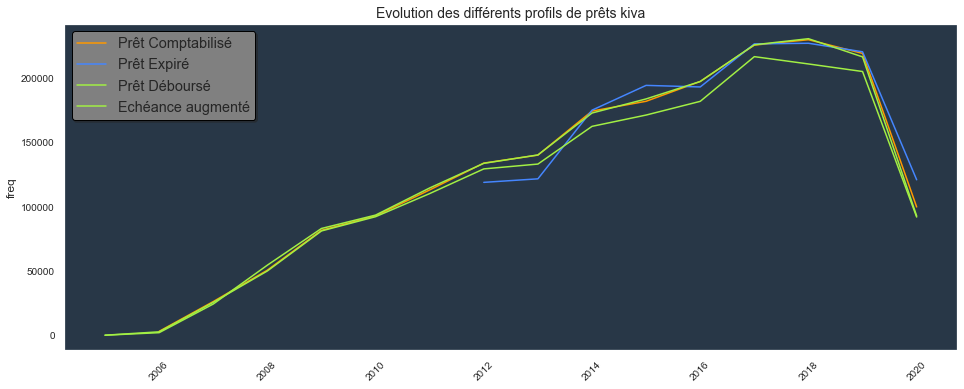

In [9]:
plt.figure(figsize=(16,6))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':10,'ytick.labelsize':10})
plt.title("Evolution des différents profils de prêts kiva",fontsize = 14)
plt.xticks(rotation=45) # Rotating X tickts by 45 degrees
sns.lineplot(x = df1.index.values, y = df1['freq'] , color = '#ff9900' , label= 'Prêt Comptabilisé')
sns.lineplot(x = df2.index.values, y = df2['freq'] , color = '#4586ff' , label = 'Prêt Expiré')
sns.lineplot(x = df3.index.values, y = df3['freq'] , color = '#a2ef44' , label = 'Prêt Déboursé')
sns.lineplot(x = df4.index.values, y = df4['freq'] , color = '#a2ef44' , label = 'Echéance augmenté')
plt.legend(facecolor= 'grey' , fontsize='large' , edgecolor = 'black' ,shadow=True) # Legend formatting
plt.show()

De cette sortie, on a retrace ainsi les activités de Kiva de sa création en 2005 jusqu'au 20/10/2020. On constate l'année 2018 représente celle où kiva a eu le plus grand nombre d'activité pour tous ces profils de prêts. Toutes fois, il importe de noter que la crise du covid a significativité impacté négativement les activités de kiva.

* Variables catégorielle

In [10]:
var_categoriel = ['LOAN_NAME','ORIGINAL_LANGUAGE','DESCRIPTION','DESCRIPTION_TRANSLATED','STATUS','ACTIVITY_NAME','SECTOR_NAME','LOAN_USE','COUNTRY_CODE','COUNTRY_NAME','TOWN_NAME','CURRENCY_POLICY','CURRENCY_EXCHANGE_COVERAGE_RATE','CURRENCY','TAGS','BORROWER_NAMES','BORROWER_GENDERS','BORROWER_PICTURED','REPAYMENT_INTERVAL','DISTRIBUTION_MODEL']
loan[var_categoriel] = loan[var_categoriel].astype('category')

In [13]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968819 entries, 0 to 1968818
Data columns (total 38 columns):
 #   Column                           Dtype              
---  ------                           -----              
 0   LOAN_ID                          int64              
 1   LOAN_NAME                        category           
 2   ORIGINAL_LANGUAGE                category           
 3   DESCRIPTION                      category           
 4   DESCRIPTION_TRANSLATED           category           
 5   FUNDED_AMOUNT                    float64            
 6   LOAN_AMOUNT                      float64            
 7   STATUS                           category           
 8   IMAGE_ID                         float64            
 9   VIDEO_ID                         float64            
 10  ACTIVITY_NAME                    category           
 11  SECTOR_NAME                      category           
 12  LOAN_USE                         category           
 13  COUNTRY_CODE

Une fois que nous connaissons le type de nos différentes variables, nous allons par suite identifier celles qui ne serons
pas utiles pour nos analyses et les supprimés pour ne retenir que les pertinentes. Comme par exemple, les variables `ACTIVITY_NAME` ne rapporte pas trop d'information étant donnée la disponibilité de la variable `SECTOR_NAME`; également pour la variable `IMAGE_ID`, on va préferé `BORROWER_PICTURED` qui renseigne si l'emprunteur a fourni sa photo ou pas.

In [109]:
var_suprime = ['LOAN_NAME','ORIGINAL_LANGUAGE','IMAGE_ID','DESCRIPTION','ACTIVITY_NAME','TOWN_NAME','CURRENCY_POLICY','TAGS','BORROWER_NAMES']

In [110]:
loan_copy = loan.copy() # On fait copie de la base pour toujours avoir recours à la base source en cas de problème.

In [111]:
loan_copy = loan_copy.drop(var_suprime, axis=1)

In [112]:
loan_copy.shape

(1968819, 29)

## Analyse globale de la base de donnée
L'object de cette partie est de ressortie les caractéristiques globales de la base de données en terme de missing values et duplicates. Par la suite, nous allons procédé à une analyse beaucoup plus fine au niveau de chaque de variable, ce dans l'optique d'identifier les valeurs éventuelles valeurs abérrantes et autres.

* Missing values

<AxesSubplot:>

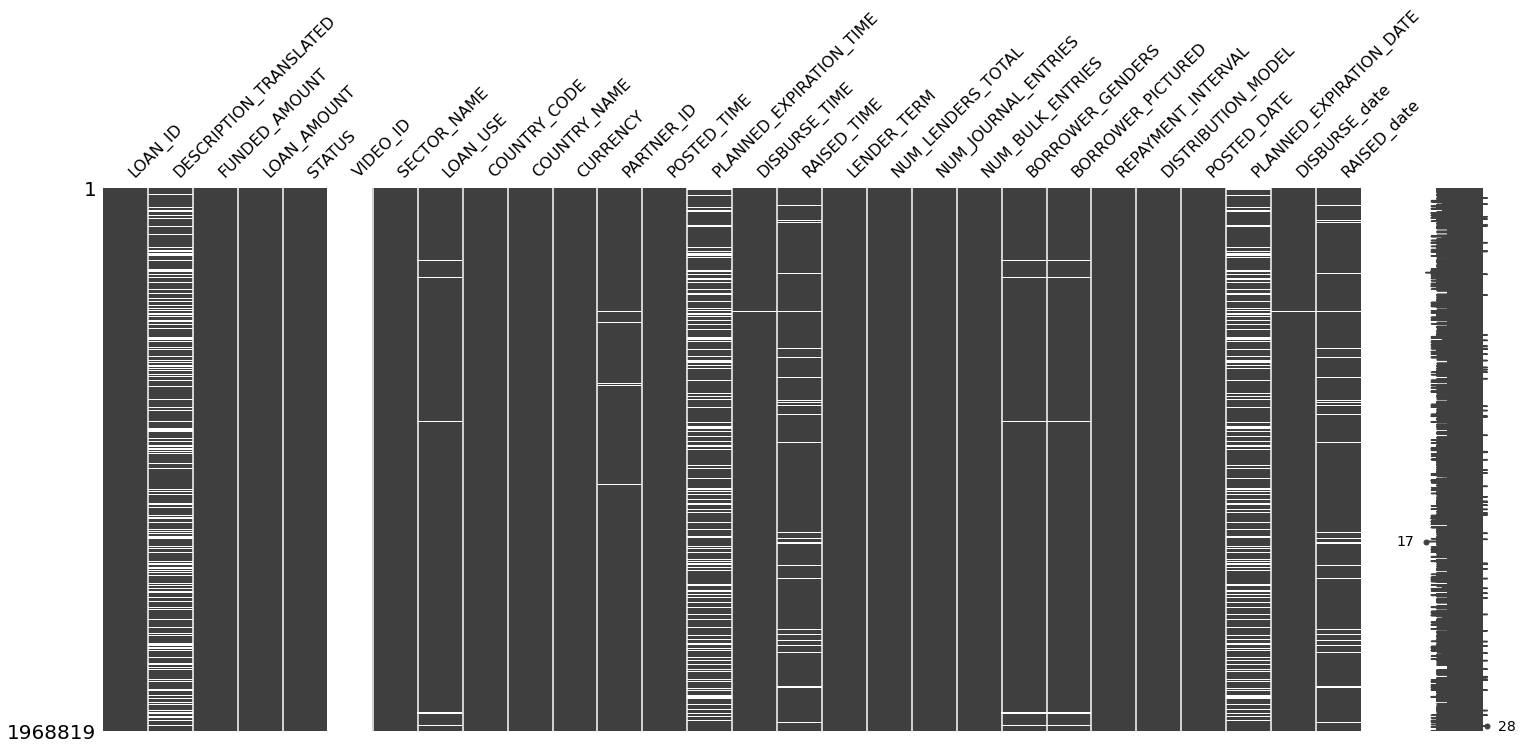

In [60]:
msno.matrix(loan_copy)

L'observation de cette sortie permet de constater que les variables `DESCRIPTION_TRANSLATED`, `VIDEO_ID`, `PLANNED_EXPIRATION_TIME`, `PLANNED_EXPIRATION_DATE`
presentent beaucoup de valeurs manquantes. Etant donné leur faible apport informationnel dans nos analyses,
nous allons nous en débarraser. Par ailleurs, notons aussi le cas de la variable **`CURRENCY_EXCHANGE_COVERAGE_RATE`** qui certe importante pour les analyses mais présente des valeurs manquantes. Pour cette dernière, nous allons la supprimer de la base de donnée et la remplacer par une variable avec un plus grand apport informationnel.En effet, dans la suite du travail, nous allons rechercher un site qui donne les taux d'échanges des différentes monnaies par rapport à l'euro et scrapper cette page pour ajouter cette information à notre base de donnée.

In [113]:
var_supprime2 = ['DESCRIPTION_TRANSLATED','CURRENCY_EXCHANGE_COVERAGE_RATE','VIDEO_ID','PLANNED_EXPIRATION_TIME','PLANNED_EXPIRATION_DATE']

In [114]:
loan_copy = loan_copy.drop(var_supprime2, axis=1)

<AxesSubplot:>

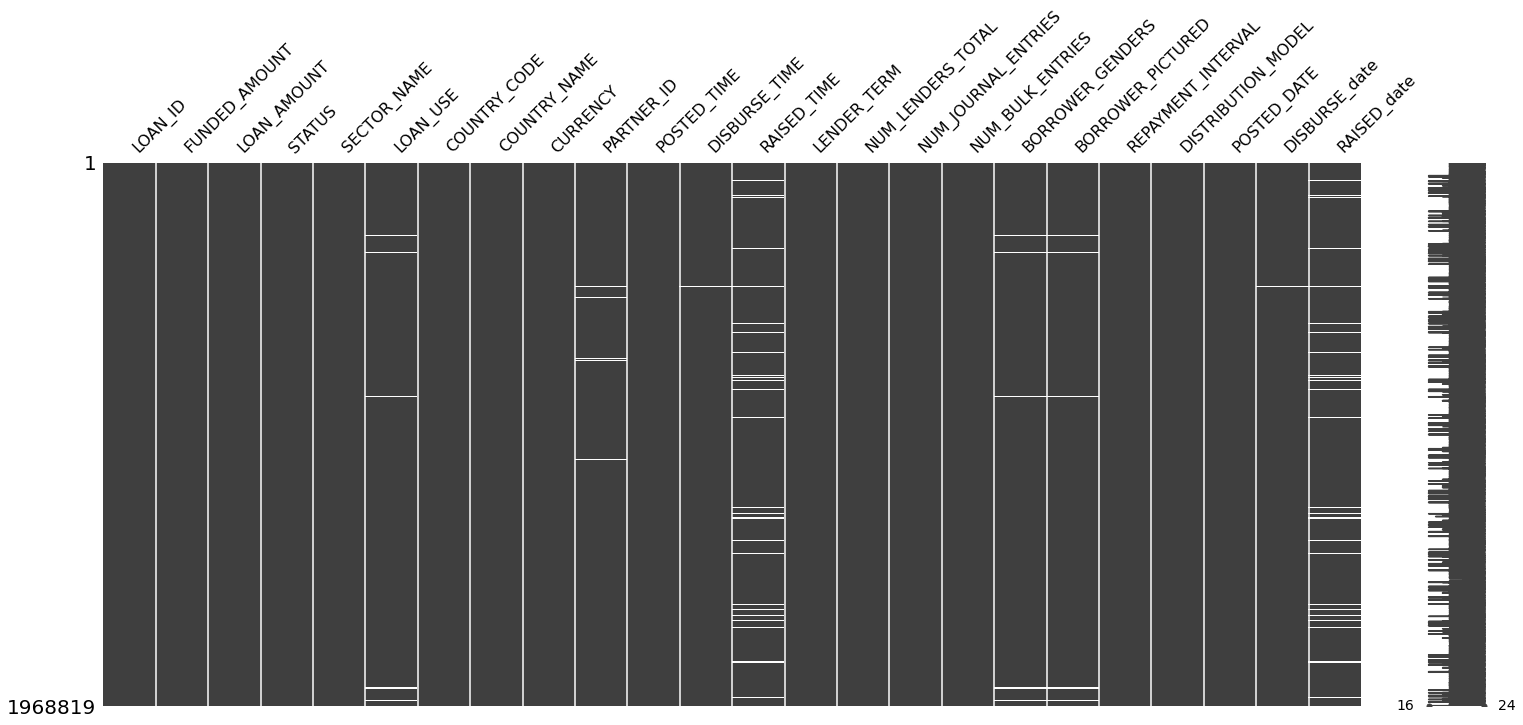

In [63]:
msno.matrix(loan_copy)

* Duplicates

In [64]:
## Nombre de données dupliqués sur la base des id
loan_copy.duplicated(subset=['LOAN_ID' ]).sum()

0

Ainsi, on voit que notre base de données ne comporte pas d'observations dupliquées. Autrement dit, chaque prêt est identifiable par son identifiant.

## Analyses spécifiques des variables
Dans cette partie, nous allons procéder aux éventuelles recodifications, renomages et traitement des variables qui présentent des incohérences. Dans un premier temps, nous allons nous intéresser aux variables catégorielles, par suite nous mettrons le focus sur les variables quantitatives.

### Traitement des variables qualitatives


In [184]:
loan_copy.columns

Index(['LOAN_ID', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS', 'SECTOR_NAME',
       'LOAN_USE', 'COUNTRY_CODE', 'COUNTRY_NAME', 'CURRENCY', 'PARTNER_ID',
       'POSTED_TIME', 'DISBURSE_TIME', 'RAISED_TIME', 'LENDER_TERM',
       'NUM_LENDERS_TOTAL', 'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL', 'POSTED_DATE', 'DISBURSE_date', 'RAISED_date',
       'taux_euro_x', 'verif', 'taux_euro_y', 'col'],
      dtype='object')

In [188]:
var_categoriel = ['STATUS','SECTOR_NAME','LOAN_USE','COUNTRY_NAME','CURRENCY','LENDER_TERM','BORROWER_GENDERS','BORROWER_PICTURED','REPAYMENT_INTERVAL','DISTRIBUTION_MODEL']

* ***Status du prêt*** : 
Cette variable représente la variable centrale de l'étude, car c'est elle que l'on cherchera à expliquer par la suite grâce aux modèles prédictifs que l'on mettra en oeuvre. De ce fait en accord avec la partie revue de littérature, après avoir présenté quelques statistiques brèves sur cette dernière, nous allons la recodifier tel que précédemment indiqué.

In [193]:
pd.crosstab(loan_copy.STATUS,'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
STATUS,
expired,4.612359
fundRaising,0.564044
funded,94.370585
refunded,0.453013


On voit bien que les prêts remboursés représentent l'origine de l'activité de kiva. En effet, ces derniers représentent `94,37%` des prêts de la structure. Le taux de défaut des clients de kiva sur la période d'étude est de `4,61%`. Ainsi, dans la partie modélisaiton afin de construire nos modèles prédicitfs sur cette variable, nous adopterons un comportment bien précis et concis en adéquation avec les études réalisées dans ce cas de figure.

Comme enseignement de la revue, nous allons à présent recodifier cette variable à fin d'avoir les entrepreneurs ayant fait défaut et ceux qui ne sont pas dans cette situation.

In [194]:
loan_copy['target'] = np.where(loan_copy['STATUS'] == 'expired', 0, 1)

In [207]:
labels = { 0 : 'defaut', 1 : 'succes'}
loan_copy['target'].apply(labels.get)
pd.crosstab(loan_copy['target'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
target,
0,4.612359
1,95.387641


Le taux de défaut global des entreprunteurs de kiva est de `4,61%`. Par la suite nous allons tirer un échantillon dans le groupe des entrepreneurs à succès pour construire les différents modèles.

* Secteur d'activité : 

In [213]:
print('Nous avons au total', len(loan_copy.SECTOR_NAME.unique()), " différentes secteurs d'activités supportées par le financement de la kiva",
     "\n En termes d'activités impactées par kiva, elles sont au nombres de : ",len(loan['ACTIVITY_NAME'].unique()),'activités.')

Nous avons au total 15  différentes secteurs d'activités supportées par le financement de la kiva 
 En termes d'activités impactées par kiva, elles sont au nombres de :  163 activités.


In [215]:
pd.crosstab(loan_copy['SECTOR_NAME'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
SECTOR_NAME,
Agriculture,25.468161
Arts,2.016742
Clothing,5.432749
Construction,1.218141
Education,3.498392
Entertainment,0.130992
Food,21.995877
Health,1.422223
Housing,5.255994


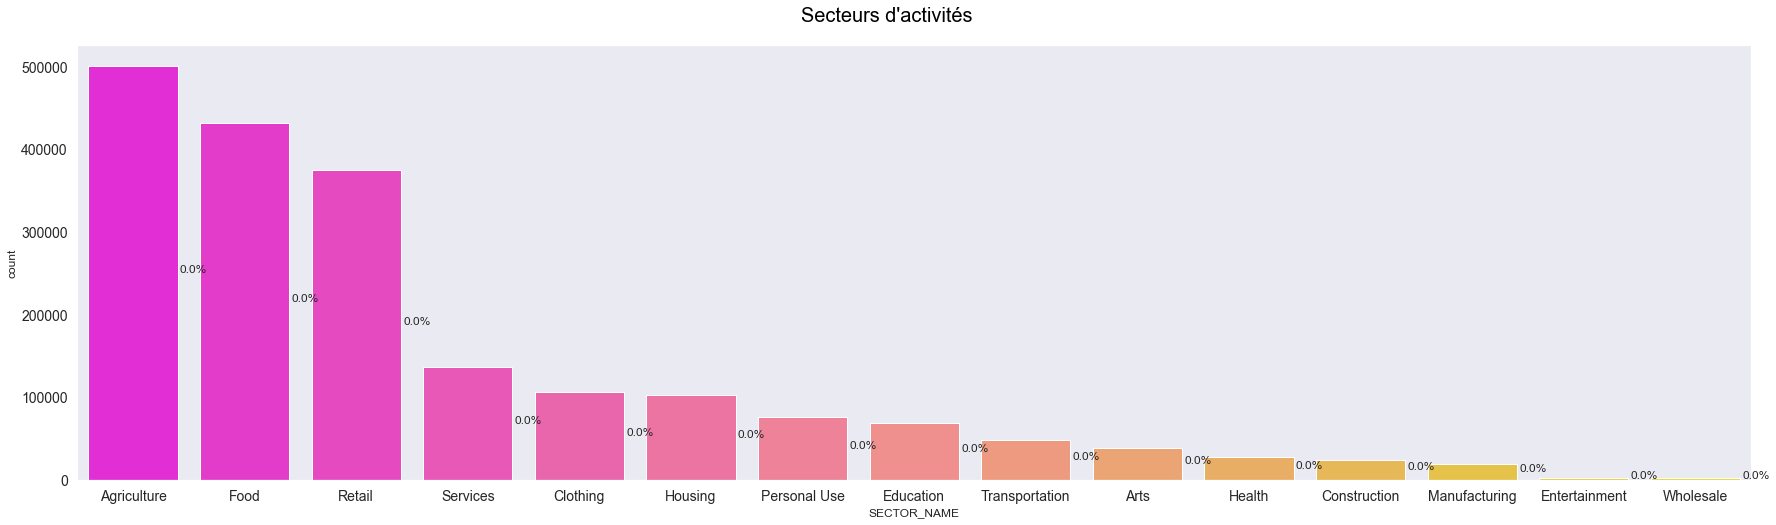

In [234]:
plt.figure(figsize=(30,8))
sns.set(rc={"axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
plt.gcf().text(.5, .93, "Secteurs d'activités", fontsize = 20, color='black' ,ha='center', va='center')
ax = sns.countplot(x=loan_copy['SECTOR_NAME'] , order =loan_copy['SECTOR_NAME'].value_counts().index , palette="spring")

total = len(loan_copy['SECTOR_NAME'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()


Etant donné que les pays sous-développés sont généralisé par la forte dépendance au secteur agricole, les données de kiva retrace parfaitement cette réalité. En effet, l'agriculture est le secteur d'activité le plus financé, à lui seul, il représente la destination de `25%` des prêts des entrepreneurs demandeurs de fonds à kiva. Ce dernier est sécondé par le secteur alimentaire qui représente prêt de `22%` des prêts de la structure. Le secteur manufacturié, du divertissement et des grossistes sont les moins représentés avec respectivement une part de `1,01%`, `0,13%` et `0,12%`.

Comme tenu du grand nombre de modalité de cette variable, nous allons la recoder. comme procédé de recodage, nous allons recoder tout en recherchant un équillibre au niveau des différentes modalités. Ainsi, les 3 modalités les plus représentatives seront laissées telles qu'elles ; les modalités `Clothing`; `Housing` et `Personnal Use` seront regroupées en la modalité `Bien_Menage`  et les autres variables serons dans la modalité autre.


In [154]:
Bien_Menage = ['Clothing','Housing','Personnal Use']
autre_secteur = ['Services','Education','Transportation','Arts','Health','Construction','Manufacturing','Entertainment','Wholesale']
conditions = [
    (loan_copy.SECTOR_NAME == 'Agriculture'),
    (loan_copy.SECTOR_NAME == 'Food'),
    (loan_copy.SECTOR_NAME == 'Retail'),
    (loan_copy.SECTOR_NAME == 'Clothing') | (loan.SECTOR_NAME == 'Housing') | (loan.SECTOR_NAME == 'Personal Use'),
    (loan_copy.SECTOR_NAME == 'Services') | (loan.SECTOR_NAME == 'Education') | (loan.SECTOR_NAME == 'Transportation') | (loan.SECTOR_NAME == 'Arts') | (loan.SECTOR_NAME == 'Health') | (loan.SECTOR_NAME == 'Services') | (loan.SECTOR_NAME == 'Construction') |  (loan.SECTOR_NAME == 'Manufacturing') | (loan.SECTOR_NAME == 'Entertainment') | (loan.SECTOR_NAME == 'Wholesale')
]
values = ['Agriculture','Food','Retail','Bien_Menage','autre_secteur']

In [155]:
loan_copy.SECTOR_NAME = np.select(conditions, values)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [153]:
pd.crosstab(loan_copy['SECTOR_NAME'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
SECTOR_NAME,
Agriculture,25.48
Arts,2.03
Clothing,5.40
Construction,1.21
Education,3.53
Entertainment,0.13
Food,21.99
Health,1.43
Housing,5.29


* **Monnaie utilisé** : 
Comme observé dans la partie analyse globale, la variable `taux de change` de la base de donnée présentait beaucoup de valeurs manquantes et ne repoindaient pas à nos attentes. Ainsi, nous avions opté de la supprimer. Nous allons ici completer notre base de donnée avec une variable taux d'échange qui sera issu d'une opération de webscrapping sur une page web. Lors de ce processus de recupération des informations online et del'ajout des ces derniers à notre base de donnée, nous allons explorer la variable `currency` en corrigeant les éventuelles erreures sur cette dernière.

#### conversion de la monnaie en euro
Dans l'optique de disposer de la variable taux d'échange qui nous permettra la conversion de toutes les monnaies présentes en **`euro (€)`** , nous faisons le scraping sur ce site: https://www.xe.com/en/currencytables/?from=EUR et utilisons `BeautifulSoup`pour avoir "comprendre" le texte ainsi scrappé.

In [174]:
import urllib
import bs4
from urllib import request

In [88]:
pip install bs4

  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1277 sha256=273315244fa783f4b59a6ddeae87ee351ab174e6adaffb92fd11277c7155bf73
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\75\78\21\68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [180]:
url = 'https://www.xe.com/en/currencytables/?from=EUR'

In [181]:
request_text = request.urlopen(url).read()
page = bs4.BeautifulSoup(request_text, 'lxml')
print(page.prettify())

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <!-- WARNING: Automated extraction of rates is prohibited under the Terms of Use. -->
  <script>
   window.pageProps = {"isMobile":false,"isTablet":false,"locale":"en","isXemtSupported":true,"countryCode":"FR","continentCode":"EU","surveyUrl":"https:\/\/www.surveymonkey.com\/r\/S2K2BR2","forceSurveyOpenInNewTab":false,"breadcrumbs":[{"text":"Home","url":"\/"},{"text":"Currency Tables","url":"https:\/\/www.xe.com\/currencytables\/"},{"text":"EUR - Euro","url":null}]};
  </script>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="en" name="lang"/>
  <meta content="This EUR currency table offers current and historic Euro rates compared to every world currency. For commercial purposes, get an automated currency feed through the XE Currency Data API." name="description"/>
  <link href="/manifest.json" rel="manifest"/>
  <link href="/favicon_white_180x180.ico" rel="icon" size

In [182]:
tableau = page.find('div', class_='historicalRateTable-wrap')
#print(tableau)

In [183]:
# Récupération des abréviations des différentes monnaies
CURRENCY = []
for currency in tableau.tbody.findAll('tr'):
    CURRENCY.append(currency.a.text)

In [184]:
# Récuration des taux de convertions
exchange = []
for taux in tableau.tbody.findAll('tr'):
    exchange.append(taux.find('td',class_='historicalRateTable-rateHeader').text)

In [185]:
#Assemblement de ces listes dans le tableau final
result_currency = pd.DataFrame(columns=['CURRENCY','taux_euro'])
result_currency['CURRENCY'] = CURRENCY
result_currency['taux_euro'] = exchange
result_currency.head()

,CURRENCY,taux_euro
0,USD,1.2112168832
1,EUR,1.0000000000
2,GBP,0.9070988285
3,INR,89.2599656876
4,AUD,1.6338255964


In [186]:
## Ajout des variables à la base de donnée
currency_database = pd.unique(loan_copy['CURRENCY']).tolist()
print(' Le nombre totale de monnaie est de : ',len(CURRENCY),
     '\n Le nombre de monnaie présent dans notre base de donnée est :',len(currency_database),
     "\n On s'attend à avoir exactement <<", len(CURRENCY) - len(currency_database),">> monnaies qui ne sont pas dans les deux listes." )

 Le nombre totale de monnaie est de :  167 
 Le nombre de monnaie présent dans notre base de donnée est : 77 
 On s'attend à avoir exactement << 90 >> monnaies qui ne sont pas dans les deux listes.


In [187]:
len(list(set(CURRENCY) - set(currency_database))) # La taille de la différence entre les deux listes.

92

On constate qu'il y'a deux monnaies présentent dans notre base de données qui ne sont pas dans la liste complètes de monnaies. Ainsi, on présuppose
que ces dernieres ont été mal libelées. Identifions ces monnaies.

In [188]:
# Boucle pour identifier les libelés des monnnaies érronés.
currency_error = []
for i in currency_database:
    if i not in CURRENCY:
        currency_error.append(i)
        print(i)

SSP
ZMK


A l'observation de ces derniers, on peut supposer que `ZMK` correspond plutôt à `ZMW` qui est la monnaie de `Zambian Kwacha` sur le site de référence. Afin de s'affranchir
de toute confusion nous allons identifer les pays qui ont ces monnaies, se reférer à la table et parsuite les remplacer.

In [189]:
# Recherhe de l'index des pays ayant une monnaie mal renseignée
index_erreur = []
for j in range(len(loan_copy.COUNTRY_NAME)):
    for k in range(len(currency_error)):
        if currency_error[k] == loan_copy.CURRENCY[j]:
            index_erreur.append(loan_copy.COUNTRY_NAME[j])

KeyError: 52

In [190]:
pays_1 = index_erreur[0]
for i in range(len(index_erreur)):
    if index_erreur[i]!=pays_1:
        print('Les pays ayant un libelé de monnaie mal renseignés sont : ', 
              '\n * ',pays_1,
              '\n * ',index_erreur[i])
        break

IndexError: list index out of range

Ainsi, on voit bien que les deux pays pour lesquels les monnais on été mal libelés sont le `South Sudan` et la `Zambia`. Ainsi, on voit bien que la précédente inturtion était correcte. En outre il importe de souligné l'importance d'avoir fait ce travail, car si on supprimait ces pays, on devait impiété négativement sur la performance du modèle à mettre sur-pied.

Dans le site de référence, la monnaie du `South Sudan` est appelé `Sudanese Pound` et est abbrégé `SDG`. Par suite, dans notre base de donnée, nous allons effectuer les changements suivants sur la variable currency :
* `SSP` en `SDG`
* `ZMK` en `ZMW`

In [191]:
print("On vérifie si les libéles 'SDG' et 'ZMK' était déjà dans la liste de la base de données. :",
      '\n*  SDG in list : ', 'SDG' in currency_database,
     '\n*  ZMW in list : ', 'ZMK' in currency_database)

On vérifie si les libéles 'SDG' et 'ZMK' était déjà dans la liste de la base de données. : 
*  SDG in list :  True 
*  ZMW in list :  True


Ainsi on voit qu'effectivement les deux libélés étaient déjà présents dans la base de donnée, ces erreurs pourraient probablement avoir pour
origine une erreur de saisit. 

In [192]:
# Remplace les libelés de monnaie de la base donnée
loan_copy['CURRENCY'] = loan_copy['CURRENCY'].replace({'SSP': 'SDG', 'ZMK': 'ZMW'})

In [193]:
new_currency_database = pd.unique(loan_copy['CURRENCY']).tolist()

In [194]:
len(new_currency_database)

75

A ce niveau, on est bien certain que tous les libelés de monnaies présents dans la base de données le sont également dans le libelé au niveau internationnal.

Nous allons ajouter la base de donnée scrapper, contenant le taux de change des monnaies par rapport à l'euro à notre base de donnée.

In [195]:
# Conversion de la colonne new_currency_database en base de donnée
df1 = pd.DataFrame({'col':new_currency_database})
# Fusion des bases de données pour en retenir uniquement les monnaies des présentes dans la base de données
currency = pd.merge(result_currency, df1, how = 'right', left_on = ['CURRENCY'],right_on = ['col']).sort_values('CURRENCY')

In [196]:
# Ajout de la variable taux de change à la base de données
loan_copy = pd.merge(loan_copy, currency, on='CURRENCY', how='outer')

Maintenant que nous avons le taux de conversion des différentes monnaies à l'euro, nous allons diviser toutes les variables
concernant les montant libélé en monnaies nationales par l'euro. Rappelons que l'importance de démarche réside dans la facilité des
interprétations qu'elle procure. En outre, grâce à cette conversion, les interprétations, analyses et comparaisons serons beacoup
plus facilent et clairent.

* **L'utilisation du prêt** :

In [253]:
loan_copy['LOAN_USE'].unique()

['to buy more sacks of charcoal to sell.', 'to buy ingredients such as sugar, coconut mil..., 'to buy more supplies to improve her store.', 'to buy additional feed for her business.', 'to build a sanitary toilet for her family.', ..., 'to pay for stock of solar lights and cell pho..., 'to maintain a stock of solar lights and cell ..., 'to pay for a large solar system and delivery ..., 'purchase solar lighting products for sale to ..., 'To buy more clothes, blankets and other goods...]
Length: 1195466
Categories (1195465, object): ['to buy more sacks of charcoal to sell.', 'to buy ingredients such as sugar, coconut mil..., 'to buy more supplies to improve her store.', 'to buy additional feed for her business.', ..., 'to maintain a stock of solar lights and cell ..., 'to pay for a large solar system and delivery ..., 'purchase solar lighting products for sale to ..., 'To buy more clothes, blankets and other goods...]

* **Pays de destination du prêt** : 

In [164]:
pd.crosstab(loan_copy['COUNTRY_NAME'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
COUNTRY_NAME,
Afghanistan,0.09
Albania,0.25
Armenia,0.86
Azerbaijan,0.51
Bangladesh,0.00
...,...
Vietnam,1.69
Virgin Islands,0.00
Yemen,0.18


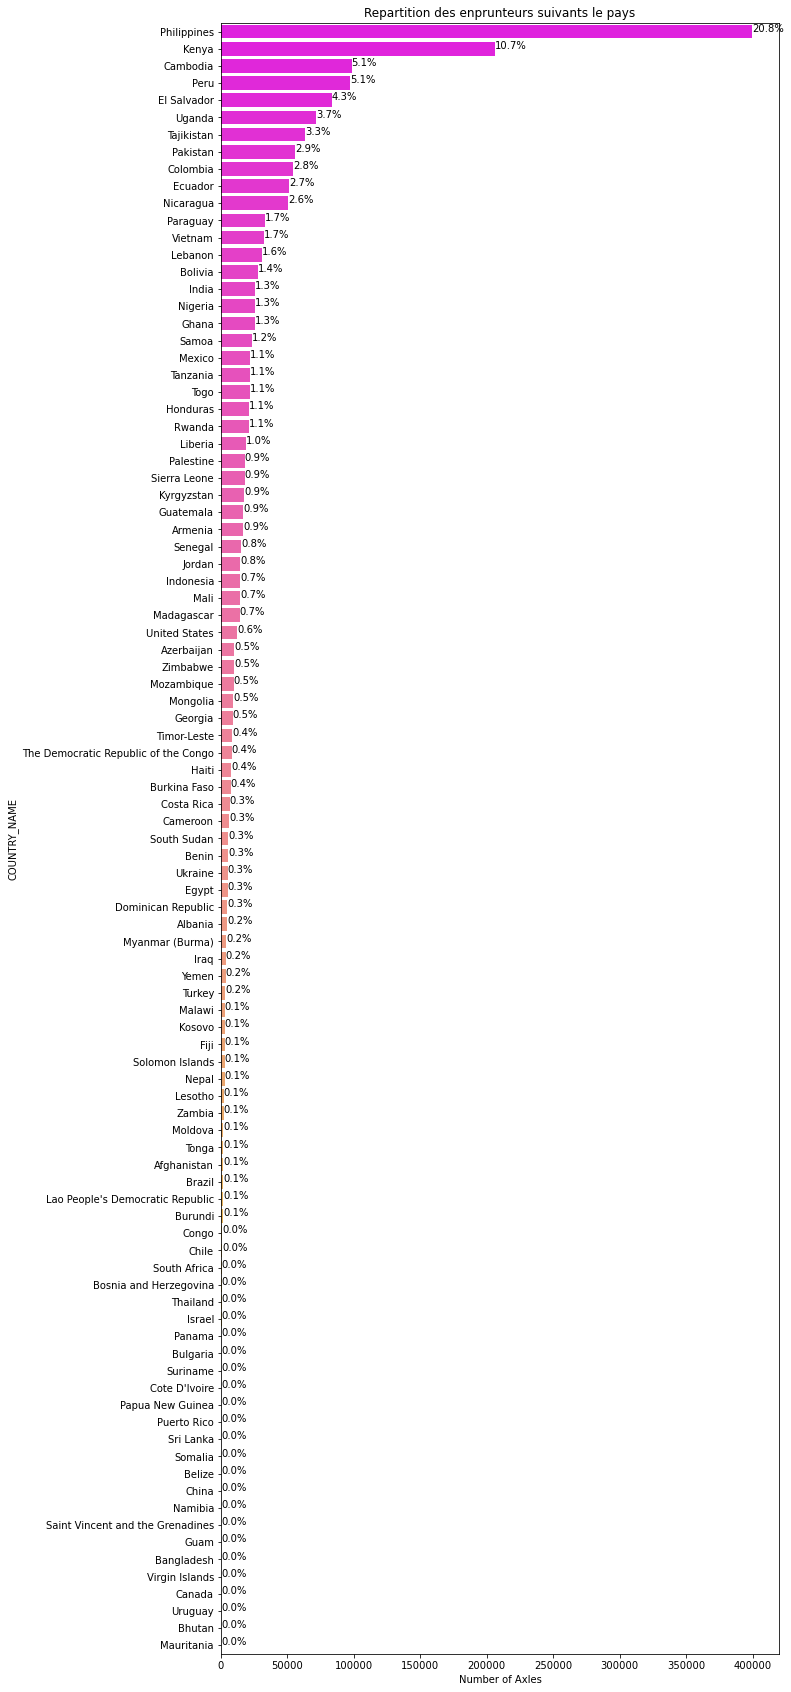

In [170]:
plt.figure(figsize=(10,30))
ax = sns.countplot(y="COUNTRY_NAME", data=loan_copy, order =loan_copy['COUNTRY_NAME'].value_counts().index , palette="spring")
#ax = sns.countplot(x=loan_copy['SECTOR_NAME'] )

plt.title('Repartition des enprunteurs suivants le pays')
plt.xlabel('Number of Axles')

total = len(loan_copy['COUNTRY_NAME'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

A l'observation de ce graphique, il en ressort que sur la période d'étude, l'activité de kiva à touché **`95 pays`**. Parmi ces pays, ceux ayant été les plus dynamiques sont `Philippines`, `Kenya`, `Cambodia`, `peru` et `El Salvador`. De ce fait,ces 5 pays sont les premiers ayant le plus grand nombre d'entrepreneurs qui ont kiva comme source de financement. Par suite, dans l'optique d'avoir une vision beaucoup plus de l'impact du travail de kiva, nous opté pour une présentation graphique beaucoup plus informative. En effet, nous nous donnons pour ambittion de faire une réprésentation spatiale des pays en utilisant leurs coordonnés géographiques (longitude, latitude). Cette représentation présente le fort intérêt de nous permettre de faire une recodification de la variable en continent, ainsi, elle pourra être pris en compte dans la modélisation. 

Pour parvenir à la réalisaiton de ce challenge, nous allons, dans un premier temps rechercher l'information en ligne sur les coordonnées géographiques des différents pays. Par suite, nous utiliserons les bibliothèques adéquates pour faire la représentation graphique. Les informations à scrapper sont disponible à l'adresse suivante : https://developers.google.com/public-data/docs/canonical/countries_csv.

In [177]:
url_pays = 'https://developers.google.com/public-data/docs/canonical/countries_csv'
request_text = request.urlopen(url_pays).read()
pays = bs4.BeautifulSoup(request_text, 'lxml')
print(pays.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta content="721724668570-nbkv1cfusk7kk4eni4pjvepaus73b13t.apps.googleusercontent.com" name="google-signin-client-id"/>
  <meta content="profile email" name="google-signin-scope"/>
  <meta content="Google Developers" property="og:site_name"/>
  <meta content="website" property="og:type"/>
  <meta content="#3f51b5" name="theme-color"/>
  <meta charset="utf-8"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link crossorigin="use-credentials" href="/_pwa/developers/manifest.json" rel="manifest"/>
  <link crossorigin="" href="//www.gstatic.com" rel="preconnect"/>
  <link crossorigin="" href="//fonts.gstatic.com" rel="preconnect"/>
  <link crossorigin="" href="//fonts.googleapis.com" rel="preconnect"/>
  <link crossorigin="" href="//apis.google.com" rel="preconnect"/>
  <link crossorigin="" href="//www.google-analytics.com" rel="preconnect"/>
  <link h

In [23]:
tableau = page.find('div', class_='historicalRateTable-wrap')
#print(tableau)

In [151]:
# Récupération des abréviations des différentes monnaies
CURRENCY = []
for currency in tableau.tbody.findAll('tr'):
    CURRENCY.append(currency.a.text)

In [173]:
len(loan_copy['COUNTRY_CODE'].unique())

95

In [246]:
np.select(conditions, values).shape

(1968819,)

* **Sexe de l'emprunteur**

In [42]:
len(pd.unique(loan_copy['BORROWER_GENDERS']))

24167

On constate que la variable sexe a 24 167 modalités. Nous allons comprendre cette erreur et la corriger car cette variable a un grand pouvoir informationnel.

In [36]:
pd.crosstab(loan_copy['BORROWER_GENDERS'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
BORROWER_GENDERS,
female,63.525647
"female, female",1.401906
"female, female, female",1.400332
"female, female, female, female",1.080292
"female, female, female, female, female",1.076077
...,...
"male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male",0.000051
"male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male",0.000102
"male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, female, male, male, male",0.000051


In [45]:
pd.crosstab(loan_copy['BORROWER_GENDERS'].isna(),'freq')

col_0,freq
BORROWER_GENDERS,
False,1923203
True,45616


Pour cette variable, nous avons 45 616 observations non renseignées. Etant donnée la distribution des erreurs au niveau des observations renseignées, nous soupçonnons que ces dernieres doivent contenir de l'information sur le mécanisme générateur des valeurs manquantes. Ainsi, pour bien comprendre ce mecanisme générateur de ces valeurs manquantes et les erreurs sur les modalités de cette variable, nous d'abord procéder à une bonne visualisation beaucoup plus large de cette variable.

In [63]:
# Configuration pour permettre l'affichage de plusieurs lignes
pd.set_option('display.max_rows', None)

In [66]:
loan_copy['BORROWER_GENDERS'][:100]

0                                                female
1                                                female
2                                                female
3                                                female
4                                                  male
5                                                  male
6                                                female
7                                                female
8                                                female
9                        female, female, female, female
10                                               female
11                                               female
12                                               female
13                                               female
14    female, female, female, female, female, female...
15                               female, female, female
16                                               female
17                   female, female, male, femal

In [67]:
pd.reset_option('^display.', silent=True) # Remet l'option d'affichage par défaut

Comme on peut le voir avec cette sortie, les soupçons précédement émis s'avèrent fausses. En effet, les observations autour de la valeurs manquantes sont très bien renseignées. Ceci ne nous renseigne pas spécifiquement sur l'origine de ces dernieres. Ainsi, par suite, nous allons les supprimer par manque d'informations additionnelles pour procéder à une éventuelle imputation. En outre, concernant les observations renseignées, ces derniers aussi posent un problème. En effet, comme on peut l'observer à les lignes `17`, `23` et `54`, une observation erronée contient à la fois la modalité **homme** et **femme**. Afin d'être cohérent dans notre démarche, nous allons uniquement retenir la première occurence. C'est à dire pour l'observation les observations susmentionnées, nous allons en retenir respectivement : `female`, `male`, `male`.

Nous allons dans la suite, dans un premier temps supprimer les observations ayant les valeurs manquantes pour la variable `Gender` sur la base totale. Ensuite, nous  allons procéder à la correction des modalités de cette variable.

In [115]:
# Suppression des missings values
loan_copy = loan_copy.dropna(how='all', subset=['BORROWER_GENDERS'])

In [116]:
sexe = loan_copy['BORROWER_GENDERS'].tolist()
len(sexe); sexe[0].split(',')[0]

'female'

In [118]:
# Boucle qui permet de recupérer le premiere la premiere occurence de chaque modalité
sexe_correct = []
for i in range(len(sexe)):
    sexe_correct.append(sexe[i].split(',')[0])

In [120]:
loan_copy['BORROWER_GENDERS'] = sexe_correct

In [121]:

print(' Le nombre de modalité de la variable obtenu est de : ',len(loan_copy['BORROWER_GENDERS'].unique()),
      "\n Le nombre d'observation de la variable est de :  ",len(loan_copy['BORROWER_GENDERS']))

 Le nombre de modalité de la variable obtenu est de :  3 
 Le nombre d'observation de la variable est de :   1923203


In [126]:
pd.crosstab(loan_copy['BORROWER_GENDERS'],'freq')

col_0,freq
BORROWER_GENDERS,
female,1474910
male,448257
unspecified,36


Comme on peut le constater, il y'a encore une modalité incorrecte à savoir `unspecified`. Nous allons encore supprimer toutes les observation de la base de donnée correspond à cette observation.

In [128]:
loan_copy.drop(loan_copy.index[loan_copy['BORROWER_GENDERS'] == 'unspecified'], inplace = True)

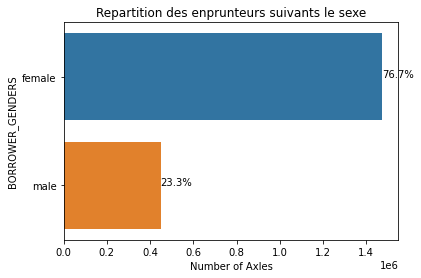

In [134]:
ax = sns.countplot(y="BORROWER_GENDERS", data=loan_copy)
plt.title('Repartition des enprunteurs suivants le sexe')
plt.xlabel('Number of Axles')

total = len(loan_copy['BORROWER_GENDERS'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Comme l'illustre cette sortie graphique, on voit bien que la plupart des entrepreneurs des pays sous dévéloppés qui empruntent des fonds d'investissements chez kiva sont les femmes. Ceci est en parfaite adéquation avec les résultats du secteur d'activités où il en est ressorti que le secteur le plus impacté par les prêts par les prêts de kiva est le `secteur agricole`. Car, dans ces pays, les femmes sont généralement plus présentes dans le secteur agricole.

* **La photo de l'emprunteur est elle disponible ?**

In [136]:
pd.crosstab(loan_copy['BORROWER_PICTURED'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1)

col_0,freq
BORROWER_PICTURED,
"false, false, false, true, true, true, true, true, false, true, true, false, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, false, true, true, true, true, true, true, true, true, true, false, true, true, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, true, false, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, false, true, true, true, false, false, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000052
...,...
"true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000156
"true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000104
"true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000468


Nous sommes encore confronté à la même difficulté que précédemment. Cette variable sera très importante pour notre modèle de prédiction, car elle permettra de savoir si le fait pour un entrepreneur de donner sa photo est gage de bonne conduite de sa part. Ainsi, nous allons nous attelé à corriger cette variables avec les considérations précédemment énoncées. A savoir ne retenir que les premières occurences des modalités et étandre la suppression des missings values à toute la base de donnée.

In [ ]:
loan_copy['BORROWER_PICTURED']

In [115]:
# Suppression des missings values
loan_copy = loan_copy.dropna(how='all', subset=['BORROWER_GENDERS'])

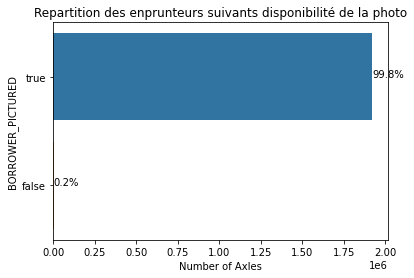

In [150]:
photo = loan_copy['BORROWER_PICTURED'].tolist()
# Boucle qui permet de recupérer le premiere la premiere occurence de chaque modalité
photo_correct = []
for i in range(len(photo)):
    photo_correct.append(photo[i].split(',')[0])

loan_copy['BORROWER_PICTURED'] = photo_correct

ax = sns.countplot(y="BORROWER_PICTURED", data=loan_copy)
plt.title('Repartition des enprunteurs suivants disponibilité de la photo')
plt.xlabel('Number of Axles')

total = len(loan_copy['BORROWER_PICTURED'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Comme illsutré par le graphique, seulement `0,2%` des emprunteurs de kiva n'ont pas envoyer de photo leur photo. Ainsi, on peut déjà présumé que cette variable ne serait pas un bon prédicteur car ne permet pas de discriminer les profils des defauts et bons des entrepreneurs. Toutes fois dans la suite, des analyses appropriées seront menées à cette fin.

* **Intervalle de remboursement**

In [162]:
pd.crosstab(loan_copy['REPAYMENT_INTERVAL'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
REPAYMENT_INTERVAL,
bullet,9.07
irregular,4.34
monthly,86.58


Les prêts de kiva sont le plus fréquemment remboursé à intervalle mensuels, soit `86,58%`. La modalité **`bullet`** représente les autres types de remboursement à fréquence régulières qui ne sont pas mensuels. Et ces derniers sont effectués par `9,07%` des entrepreneurs.

* **Model de distribution du prêt** : 
Il est important de noter que pour bénéficier d'un prêt en provenance de kiva, soit l'entrepreneur fait recours à une structure partenaire, soit elle demande directement auprès de l'organisation. Ainsi, cette variable permet de capter le moyen d'obtention du prêt.

In [163]:
pd.crosstab(loan_copy['DISTRIBUTION_MODEL'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
DISTRIBUTION_MODEL,
direct,1.03
field_partner,98.97


Comme l'illustre cette sortie, la presque totalité des prêts occtroiyés par kiva sont faits par leurs strutures partenaires qui sont présents qu niveau local dans l'ensmebles des pays membres.

## Traitement des variables quantitatives

Pour chacune de ces variables, nous identifierons s'il s'agit d'un montant en unité monétaire ou pas. Cette connaissance nous ai fondalement car grâce à elle, on saura si une conversion de la dite variable en `euro` est nécessaire.

In [17]:
var_quanti = ['FUNDED_AMOUNT','LOAN_AMOUNT','PARTNER_ID','LENDER_TERM','NUM_LENDERS_TOTAL','NUM_JOURNAL_ENTRIES','NUM_BULK_ENTRIES']
var_date = ['POSTED_DATE', 'DISBURSE_date', 'RAISED_date']

#### Convertion variables monétaires en euro
les variables à convertir en monnaie sont : Funded amount, Loan amount. Pour la conversion, nous allons diviser chacune de ces variable par le taux en euro. En effet, ces taux ont été pris au certain. C'est-à-dire, que combien d'unités de ces monnaies seront nécessaires pour obetenir un euro.

In [197]:
loan_copy['FUNDED_AMOUNT'] = loan_copy['FUNDED_AMOUNT'] / loan_copy['taux_euro']

TypeError: unsupported operand type(s) for /: 'float' and 'str'

In [205]:
float(loan_copy['taux_euro'].values)

TypeError: only size-1 arrays can be converted to Python scalars

In [69]:
loan_copy[var_quanti].describe() # Description des variables quantitatives de la base de données.

,FUNDED_AMOUNT,LOAN_AMOUNT,PARTNER_ID,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES
count,1.968819e+06,1.968819e+06,1.948516e+06,1.968795e+06,1.968819e+06,1.968819e+06,1.968819e+06
mean,7.794666e+02,8.235622e+02,1.659668e+02,1.314693e+01,2.142341e+01,1.561344e+00,1.153008e+00
std,1.522751e+03,1.602688e+03,1.047908e+02,7.304365e+00,4.155283e+01,1.093998e+00,5.257283e-01
min,0.000000e+00,2.500000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.750000e+02,2.750000e+02,1.080000e+02,8.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00
50%,5.000000e+02,5.000000e+02,1.450000e+02,1.300000e+01,1.400000e+01,1.000000e+00,1.000000e+00
75%,9.000000e+02,9.750000e+02,1.850000e+02,1.400000e+01,2.600000e+01,2.000000e+00,1.000000e+00
max,5.000000e+05,5.000000e+05,6.140000e+02,1.950000e+02,1.526500e+04,1.260000e+02,6.300000e+01


Les princiaples enseingnements du tableau :
  * **FUNDED_AMOUNT** : 
Le minimum des montants empruntés auprès de kiva durant la période d'analyse est de 0. Ce qui est incohérent car un entrepreneur rationel n'irait pas
prêté un tel montant. Ainsi, nous considérerons ces observations comme étant à problème et nous allons litéralement les supprimer.

In [75]:
pd.crosstab(loan_copy.CURRENCY,'freq')

col_0,freq
CURRENCY,
AFN,1958
ALL,4879
AMD,10403
AZN,8039
BAM,608
...,...
YER,4235
ZAR,597
ZMK,51
